<a href="https://colab.research.google.com/github/KehEatCode/Projects/blob/main/test11R_project_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Milestone 1**

##<b>Problem Definition</b>
**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What is it that we are trying to solve using data science?

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## <b>Important Notes</b>

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdowns cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques. 

### **Import the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
upload = files.upload()

Saving hmeq.csv to hmeq.csv


### **Read the dataset**

In [3]:
hm=pd.read_csv("hmeq.csv")

In [4]:
# Copying data to another variable to avoid any changes to original data
data=hm.copy()

### **Print the first and last 5 rows of the dataset**

In [5]:
# Display first five rows
# Remove ___________ and complete the code

data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [6]:
# Display last 5 rows
# Remove ___________ and complete the code
data.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


### **Understand the shape of the dataset**

In [7]:
# Check the shape of the data
# Remove ___________ and complete the code

data.shape

(5960, 13)

🌟**Insights**

* The dataset has 5960 rows and 13 columns.

### **Check the data types of the columns**

In [8]:
# Check info of the data
# Remove ___________ and complete the code
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


🌟**Insights**
* There are 5960 observations and 13 columns in the dataset.

* REASON, JOB are of object type while rest of columns are of numeric type.

* Except BAD and LOAN, the rest of columns have the missing values in the dataset.

### **Check for missing values**

In [9]:
# Analyse missing values - Hint: use isnull() function
# Remove ___________ and complete the code
data.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [10]:
# Check the percentage of missing values in the each column.
# Hint: divide the result from the previous code by the number of rows in the dataset
# Remove ___________ and complete the code

data.isnull().sum()*100 / len(data)

BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64

🌟**Insights ________**

* There are **no missing values** in the BAD and LOAN columns. 

* Except the BAD and LOAN columns, the rest of columns have the missing value.

* We can observe from the above graph, there are 8.69% of values in the column MORTDUE are missing. Besides, there are missing values in other columns; VALUE(1.88%), REASON(4.23%), JOB(4.68%), YOJ(8.64%), DEROG(11.88%), DELINQ(9.73%), CLAGE(5.17%), NINQ(8.55%), CLNO(3.72), DEBTINC(21.26%).

### **Think about it:**
- We found the total number of missing values and the percentage of missing values, which is better to consider?

  * The percentage of missing values is better to consider. The percentage of missing value can more intuitively display the proportion of missing value in the entire database. 
  * Besides, the percentage of missing value can give us a direct way to compare the size of missing value among different variables. 
  


- What can be the limit for % missing values in a column in order to avoid it and what are the challenges associated with filling them and avoiding them? 
    * The percentage of missing value also have some limitations. For example, it can not tell us specific detail of missing data, like which data is missing.Besides, if the missing value is not random, the potential bias due to missing data will cause the bad performance in the model. 
    * We can fill the missing value with mean imputer, however if the distribution is not close to normal, we should fill the missing value with median imputer.

**We can convert the object type columns to categories**

`converting "objects" to "category" reduces the data space required to store the dataframe`

### **Convert the data types**

In [11]:
cols = data.select_dtypes(['object']).columns.tolist()

#adding target variable to this list as this is an classification problem and the target variable is categorical

cols.append('BAD')

In [12]:
cols

['REASON', 'JOB', 'BAD']

In [13]:
# Changing the data type of object type column to category. hint use astype() function
# remove ___________ and complete the code

for i in cols:
    data[i] = data[i].astype('category')

In [14]:
# Checking the info again and the datatype of different variable
# remove ___________ and complete the code

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


### **Analyze Summary Statistics of the dataset**

In [15]:
# Analyze the summary statistics for numerical variables
# Remove ___________ and complete the code

data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
BAD,5960.0,2.0,0.0,4771.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LOAN,5960.0,NaN,NaN,NaN,18607.969799,11207.480417,1100.0,11100.0,16300.0,23300.0,89900.0
MORTDUE,5442.0,NaN,NaN,NaN,73760.8172,44457.609458,2063.0,46276.0,65019.0,91488.0,399550.0
VALUE,5848.0,NaN,NaN,NaN,101776.048741,57385.775334,8000.0,66075.5,89235.5,119824.25,855909.0
REASON,5708,2,DebtCon,3928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JOB,5681,6,Other,2388,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YOJ,5445.0,NaN,NaN,NaN,8.922268,7.573982,0.0,3.0,7.0,13.0,41.0
DEROG,5252.0,NaN,NaN,NaN,0.25457,0.846047,0.0,0.0,0.0,0.0,10.0
DELINQ,5380.0,NaN,NaN,NaN,0.449442,1.127266,0.0,0.0,0.0,0.0,15.0
CLAGE,5652.0,NaN,NaN,NaN,179.766275,85.810092,0.0,115.116702,173.466667,231.562278,1168.233561


🌟**Insights ______________**

* There are 5960 observations in the dataset. 
* Average amount of loan approved is 18607.  It has a large range of values from 1100 to 89,900. At least 50% of applicants get a loan amount (16,300) that is less than the average approved amount.
* Average amount due on the existing mortgage is 73,760, at least 50% applicants' amount due on the existing mortgage is above the average level.
* The average current value of the property of applicants is 101,776. At least 75% of clients have 119,824 of property.  
* Average years at present job of cliens are ~9 years, which is higher than the 50% of applicants. 
* Average number of delinquency or late payments are ~25%.
* Average number of delinquent credit lines are ~45%
* Average number of recent credit inquiries are 1, it ranges from 0 to 17 times.
* Average number of existing credit lines are 21%, which is higher than the 50% of customers' the existing credit lines. 
* The average debt to income ratio are 33%, which is below 50% of customers'.The debt to income ratio ranges from 0.52% to 203%. It would be interesting to observe whether the income level have an impact on debt. 

In [16]:
# Check summary for categorical data - Hint: inside describe function you can use the argument include=['category']
# Remove ___________ and complete the code

data.describe(include='category').T

,count,unique,top,freq
BAD,5960,2,0,4771
REASON,5708,2,DebtCon,3928
JOB,5681,6,Other,2388


🌟**Insights _____________**

* Whether an applicant has defaulted or has been severely delinquent indicated by the variable BAD is the target variable and the rest are the independent variables based on which we will predict clients who are likely to default on their loan. 

* Target (BAD) is a binary variable indicating whether the applicant ultimately defaults or is seriously delinquent. The largest proportion of them is 0. i.e. the majority of applicants did not default or were seriously delinquent and re-acquired the loan.

* Most of the reasons for requesting a loan are because of debt consolidation, most applicants take out a new loan to pay off other liabilities.

* Most applicants did not fill in their detailed occupational information, either due to privacy concerns or unemployed.

**Let's look at the unique values in all the categorical variables**

In [17]:
# Checking the count of unique values in each categorical column 
# Remove ___________ and complete the code

cols_cat= data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts(normalize=True))
    print('*'*40)

Unique values in BAD are :
0    0.800503
1    0.199497
Name: BAD, dtype: float64
****************************************
Unique values in REASON are :
DebtCon    0.688157
HomeImp    0.311843
Name: REASON, dtype: float64
****************************************
Unique values in JOB are :
Other      0.420349
ProfExe    0.224608
Office     0.166872
Mgr        0.135011
Self       0.033973
Sales      0.019187
Name: JOB, dtype: float64
****************************************


**Insights _____________**

* BAD includes 2 unique values, whether the applicant ultimately defaults (1) or not(0); at least 80% of applicants did not default.

* REASON (the reason for applying a loan) contains 2 unique values; at least 69% of applicant request a loan due to the debt consolidation, most applicants take out a new loan to pay off other debts.

* JOB includes 6 unique values; at least 42% of applicants did not fill in their detailed occopational information.

### **Think about it**
- The results above gave the absolute count of unique values in each categorical column. Are absolute values a good measure? 
 * Absolute value is not a good measure as it will ignore some negative elements in the array. Using absolute value well decrease the number of elements.
- If not, what else can be used? Try implementing that. 
 * We can create a set of same data type as array and find the absolute value of each element and store the elements in the array. The set will store one single value even if multiple values are encountered. After all elements are entered, return the length of the set. This will give the number of unique elements in the array.

## **Exploratory Data Analysis (EDA) and Visualization**

## **Univariate Analysis**

Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables

### **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyze the numerical columns.

In [18]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and return the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

#### Using the above function, let's first analyze the Histogram and Boxplot for LOAN

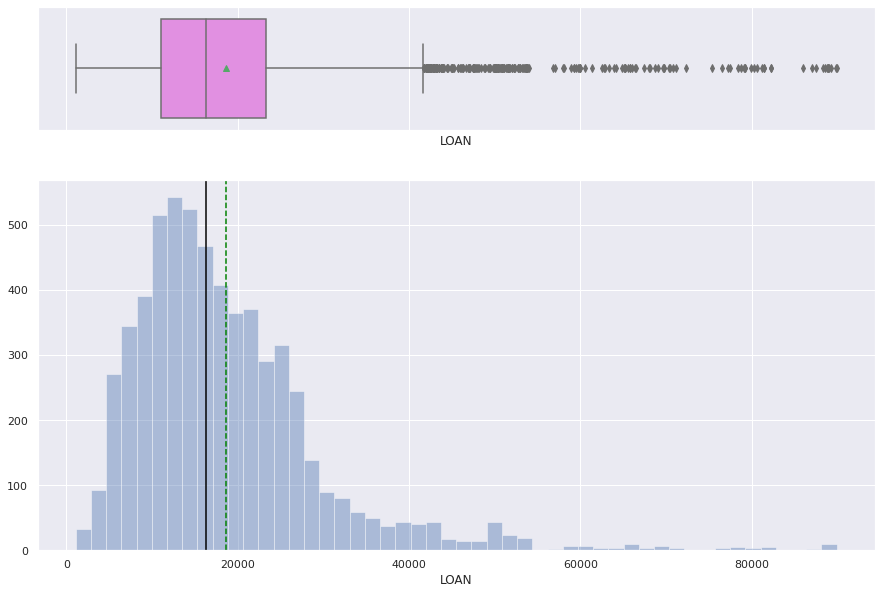

In [19]:
# Build the histogram boxplot for Loan
histogram_boxplot(data['LOAN'])

🌟**Insights __________**

* The distribution of LOAN is right-skewed. This suggest that most of the applicants apply for microloans. The peak of the distribution shows that most of applicants request a loan ranges from 14K to 16K.
* There are some outliers in the data. Few applicants apply for a loan amount of more than 40K, and very few applicants apply for a loan of more than 80K.
* The number of applicants applying for more than 180K loans is rapidly decreasing.

#### **Note:** As done above, analyze Histogram and Boxplot for other variables

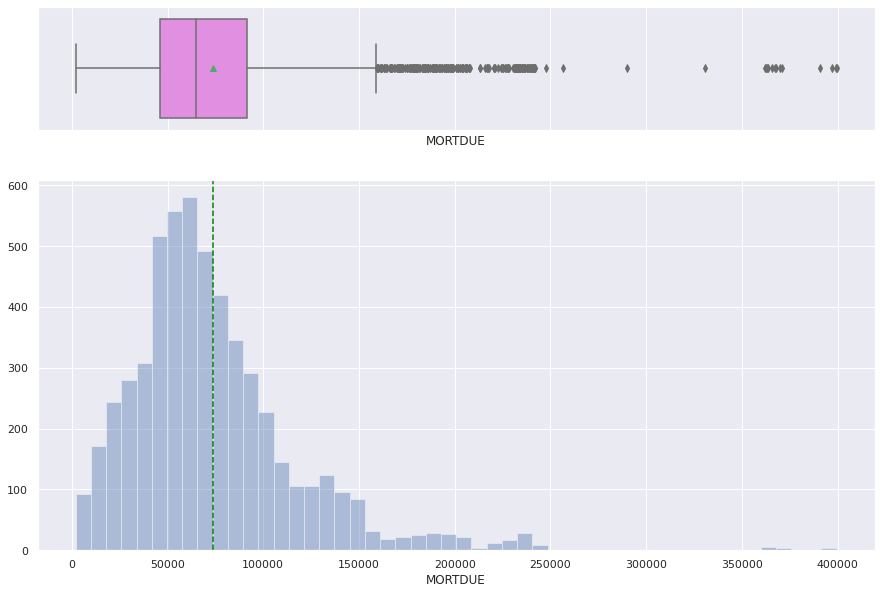

In [20]:
histogram_boxplot(data['MORTDUE'])

🌟**Insights ____________**

* The distribution of MORTDUE is right skewed. This indicates that most of applicants have few amount due on the existing mortgage.
* The amount due on the existing mortgage for most applicants is 70K.
* There are some outliers in the data. The number of applicants with an amount due on the existing mortgage over 70k is rapidly decreasing, and very few applicants have an amount due on the existing mortgage over 400k.

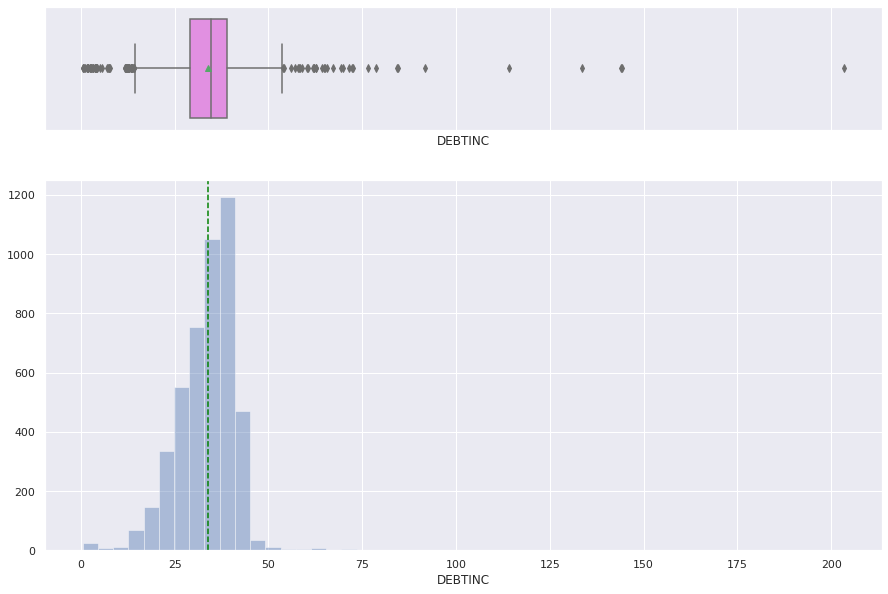

In [21]:
histogram_boxplot(data['DEBTINC'])

🌟**Insights ____________**
* The distribution of DEBTINC is right-skewed. This implies that most of applicants have a low debt-to-income ratio, which means the majority of applicants's income is higher than the debt.

* The majority of applicants have around 35%-40% of debt to income ratio. 

* The number of applicants with a debt-to-income ratio more than 45% has fallen repidly.

* There are some outliers in the data. A very few number of applicants' debt-to-income ratio exceeding 200%.

### **2. Univariate Analysis - Categorical Data**

In [22]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage 
        
    plt.show() # show the plot

#### Analyze Barplot for DELINQ

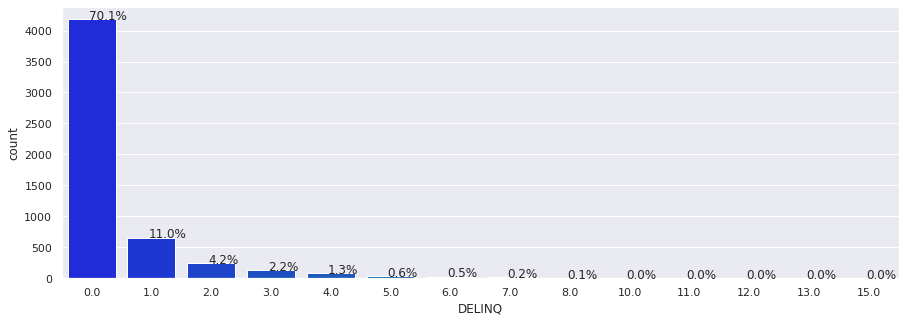

In [23]:
#Build barplot for DELINQ

plt.figure(figsize=(15,5))
ax = sns.countplot(data["DELINQ"],palette='winter')
perc_on_bar(ax,data["DELINQ"])

🌟**Insights ________**
* The DELINQ has a right-skewed distribution, which indicates most of applicants make payments on time, but there a few applicants did not make the minimum payments 30 to 60 days past the day on which the payments were due.

* At least 70.1% of applicants have no delinquent credit lines, 11% of applicants have 1 delinquent credit line.

* We have to notice that there are 0.1% of applicants have 8 delinquent credit lines. The poor credit history could have a negative impact on their loan application. We can observe the relationship between credit history and loan eligibility for approval later. 

#### **Note:** As done above, analyze Histogram and Boxplot for other variables.

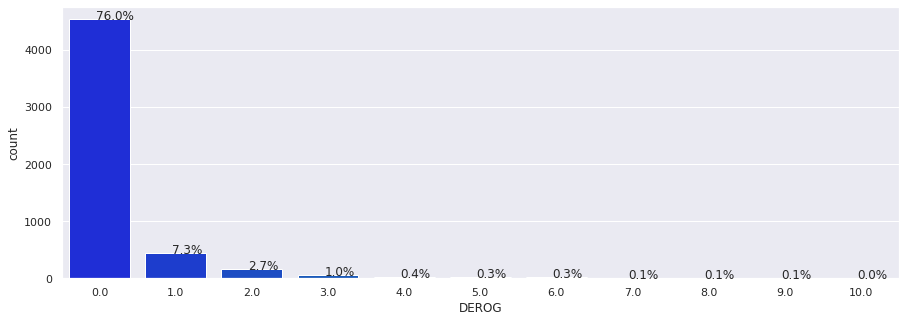

In [24]:
#Build barplot for DEROG
plt.figure(figsize=(15,5))
ax = sns.countplot(data["DEROG"],palette='winter')
perc_on_bar(ax,data["DEROG"])

🌟**Insights _____________**
* The DEROG has a right-skewed distribution, which implies that most of applicants did not have a serious delinquency or late payments.

* At least 76% of applicants have no major derogatory reports, 7.3% of applicants have 1 major derogatory reports.

* There are 0.1% of applicants have 9 major derogatory reports. This serious delinquency history could have a negative impact on their loan applicaiton. We can see the relationship between derogatory reports and loan eligibility for approval later. 


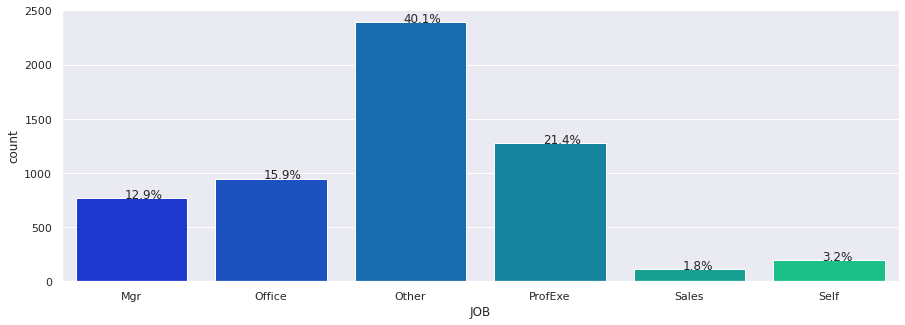

In [25]:
#Build barplot for CLNO
plt.figure(figsize=(15,5))
ax = sns.countplot(data["JOB"],palette='winter')
perc_on_bar(ax,data["JOB"])

🌟**Insights _____________**

* The distribution of applicants job appers to have a normal distribution without skewed.

* The above chart shows that the type of job that loan applicants has, such as 'other'(40.1%), ProfExe(21.4%), Office(15.9%), Manager(12.9%), self-employed(3.2%) and sales(1.8%).

* At least 40.1% of the applicants filled 'Other' as their job. It might due to privacy concerns or unemployed. 

* We can see the relationship between job types and loan eligibility for approval later. 

## **Bivariate Analysis**

###**Bivariate Analysis: Continuous and Categorical Variables**

#### Analyze BAD vs Loan

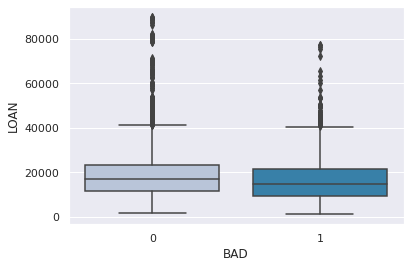

In [26]:
sns.boxplot(data["BAD"],data['LOAN'],palette="PuBu")

🌟**Insights _____________**

* The above graph shows the difference on whether the applicants' default on their loan to their amount of loan approved. 
* Applicants who defaulted on their loans had fewer loan amounts approved than those who did not.
* The majority of applicants who did not default on loans can get a higher amount of loan than applicants who default on loans.
* We can observe from the above graph for applicants who default on loans, they do not have the eligibility of getting a loan of more than 80K. In contrast, for applicants who paid the loan on time can get more than 80k loan. 

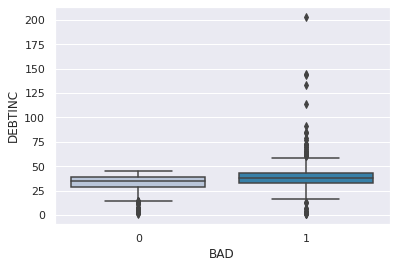

In [27]:
sns.boxplot(data["BAD"],data['DEBTINC'],palette="PuBu")

🌟**Insights _____________**

* The above chart shows the relationship between on whether the applicants' default on loans and the debt-to-income ratio.
* We can find that for applicants who default on loans have a higher debt-to-income ratio. We can say that applicants who have poor financial situation are more likely to default on loans.
* A small number of applicants who default on loans with a 200% debt-to-income ratio.

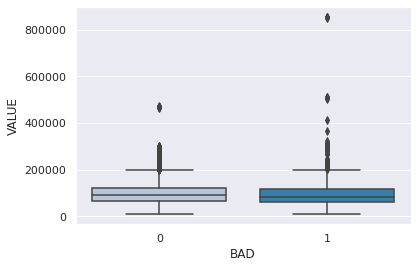

In [28]:
sns.boxplot(data["BAD"],data['VALUE'],palette="PuBu")

🌟**Insights ______**

* The above graph shows the realtionship between whether  and the debt-to-income ratio. 
* We can observe that the more current value of the property the applicants have, the more likely they default on loans. 
* A small number of applicants who default on loans with property over 800K.


####**Note:** As shown above, perform Bi-Variate Analysis on different pair of Categorical and continuous variables

### **Bivariate Analysis: Two Continuous Variables**

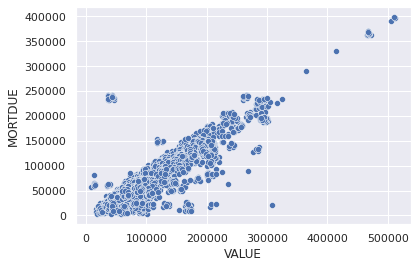

In [29]:
sns.scatterplot(data["VALUE"],data['MORTDUE'],palette="PuBu")

**Insights: _____**

* There is a strong postivite correlation between the current value of the property (VALUE) and amount due on the existing mortgage (MORTDUE). 
* The amount due on the existing mortgage tends to incresase with an increase in the current value of the property. 
* There are some outliers but it would not impact on the correlation results. 

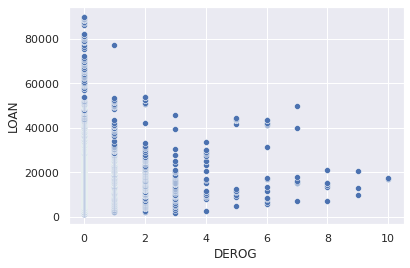

In [30]:
sns.scatterplot(data["DEROG"],data['LOAN'],palette="PuBu")

#### **Note:** As shown above, perform Bivariate Analysis on different pairs of continuous variables

**Insights ____________**
* There is no correlation between DEROG and LOAN since no trend is visible between the two variables. This might be due to outliers.

### **Bivariate Analysis:  BAD vs Categorical Variables**

**The stacked bar chart (aka stacked bar graph)** extends the standard bar chart from looking at numeric values across one categorical variable to two.

In [31]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['BAD'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['BAD'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

#### Plot stacked bar plot for for LOAN and REASON

BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
------------------------------------------------------------------------------------------------------------------------


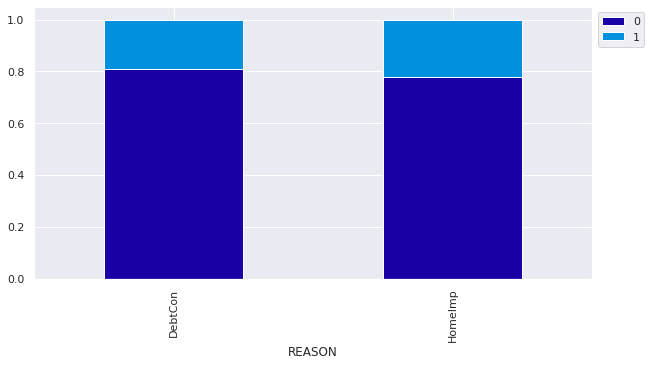

In [32]:
# Plot stacked bar plot for BAD and REASON
stacked_plot(data['REASON'])

**Insights ____________**

* Nearly 20% of applicants who applied for loans on the grounds of debt consolidation defaulted on loans.

* At least 22% of applicants who applied for loans on the grounds of home improvement defaulted on loans. 

* 
We can conclude that the two reasons why an applicant applies for a loan is not significantly different in terms of whether or not an applicant defaults

#### **Note:** As shown above, perform Bivariate Analysis on different pairs of Categorical vs BAD

BAD         0     1   All
JOB                      
Mgr       588   179   767
Office    823   125   948
Other    1834   554  2388
ProfExe  1064   212  1276
Sales      71    38   109
Self      135    58   193
All      4515  1166  5681
------------------------------------------------------------------------------------------------------------------------


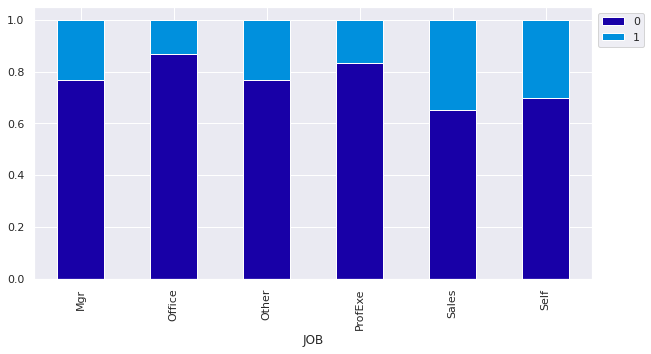

In [33]:
stacked_plot(data['JOB'])

**Insights ___________________**

* The graph above shows the relationship between the applicant's occupational type and default situation.

* Among the job types of loan applicants, we found that sales applicants had the highest default rate, reaching 35%; applicants who were corporate employees had the lowest default rate, about 13%.

### **Multivariate Analysis**

#### Analyze Correlation Heatmap for Numerical Variables

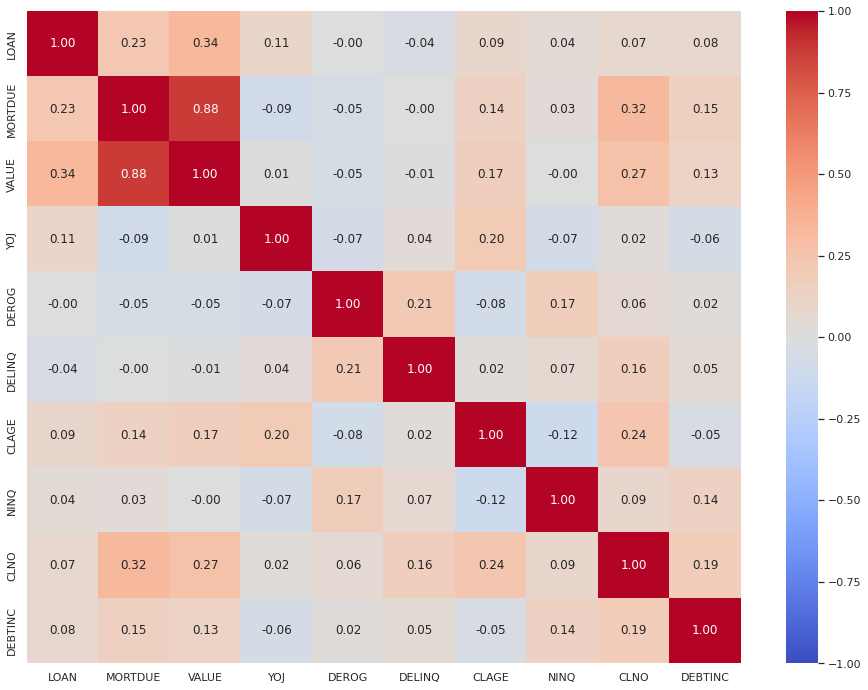

In [34]:
# Separating numerical variables
numerical_col = data.select_dtypes(include=np.number).columns.tolist()

# Build correlation matrix for numerical columns
# Remove ___________ and complete the code

corr = data[numerical_col].corr()

# plot the heatmap
# Remove ___________ and complete the code

plt.figure(figsize=(16,12))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm',vmax=1,vmin=-1,
        fmt=".2f",
        xticklabels=corr.columns,
        yticklabels=corr.columns);

<Figure size 1152x864 with 0 Axes>

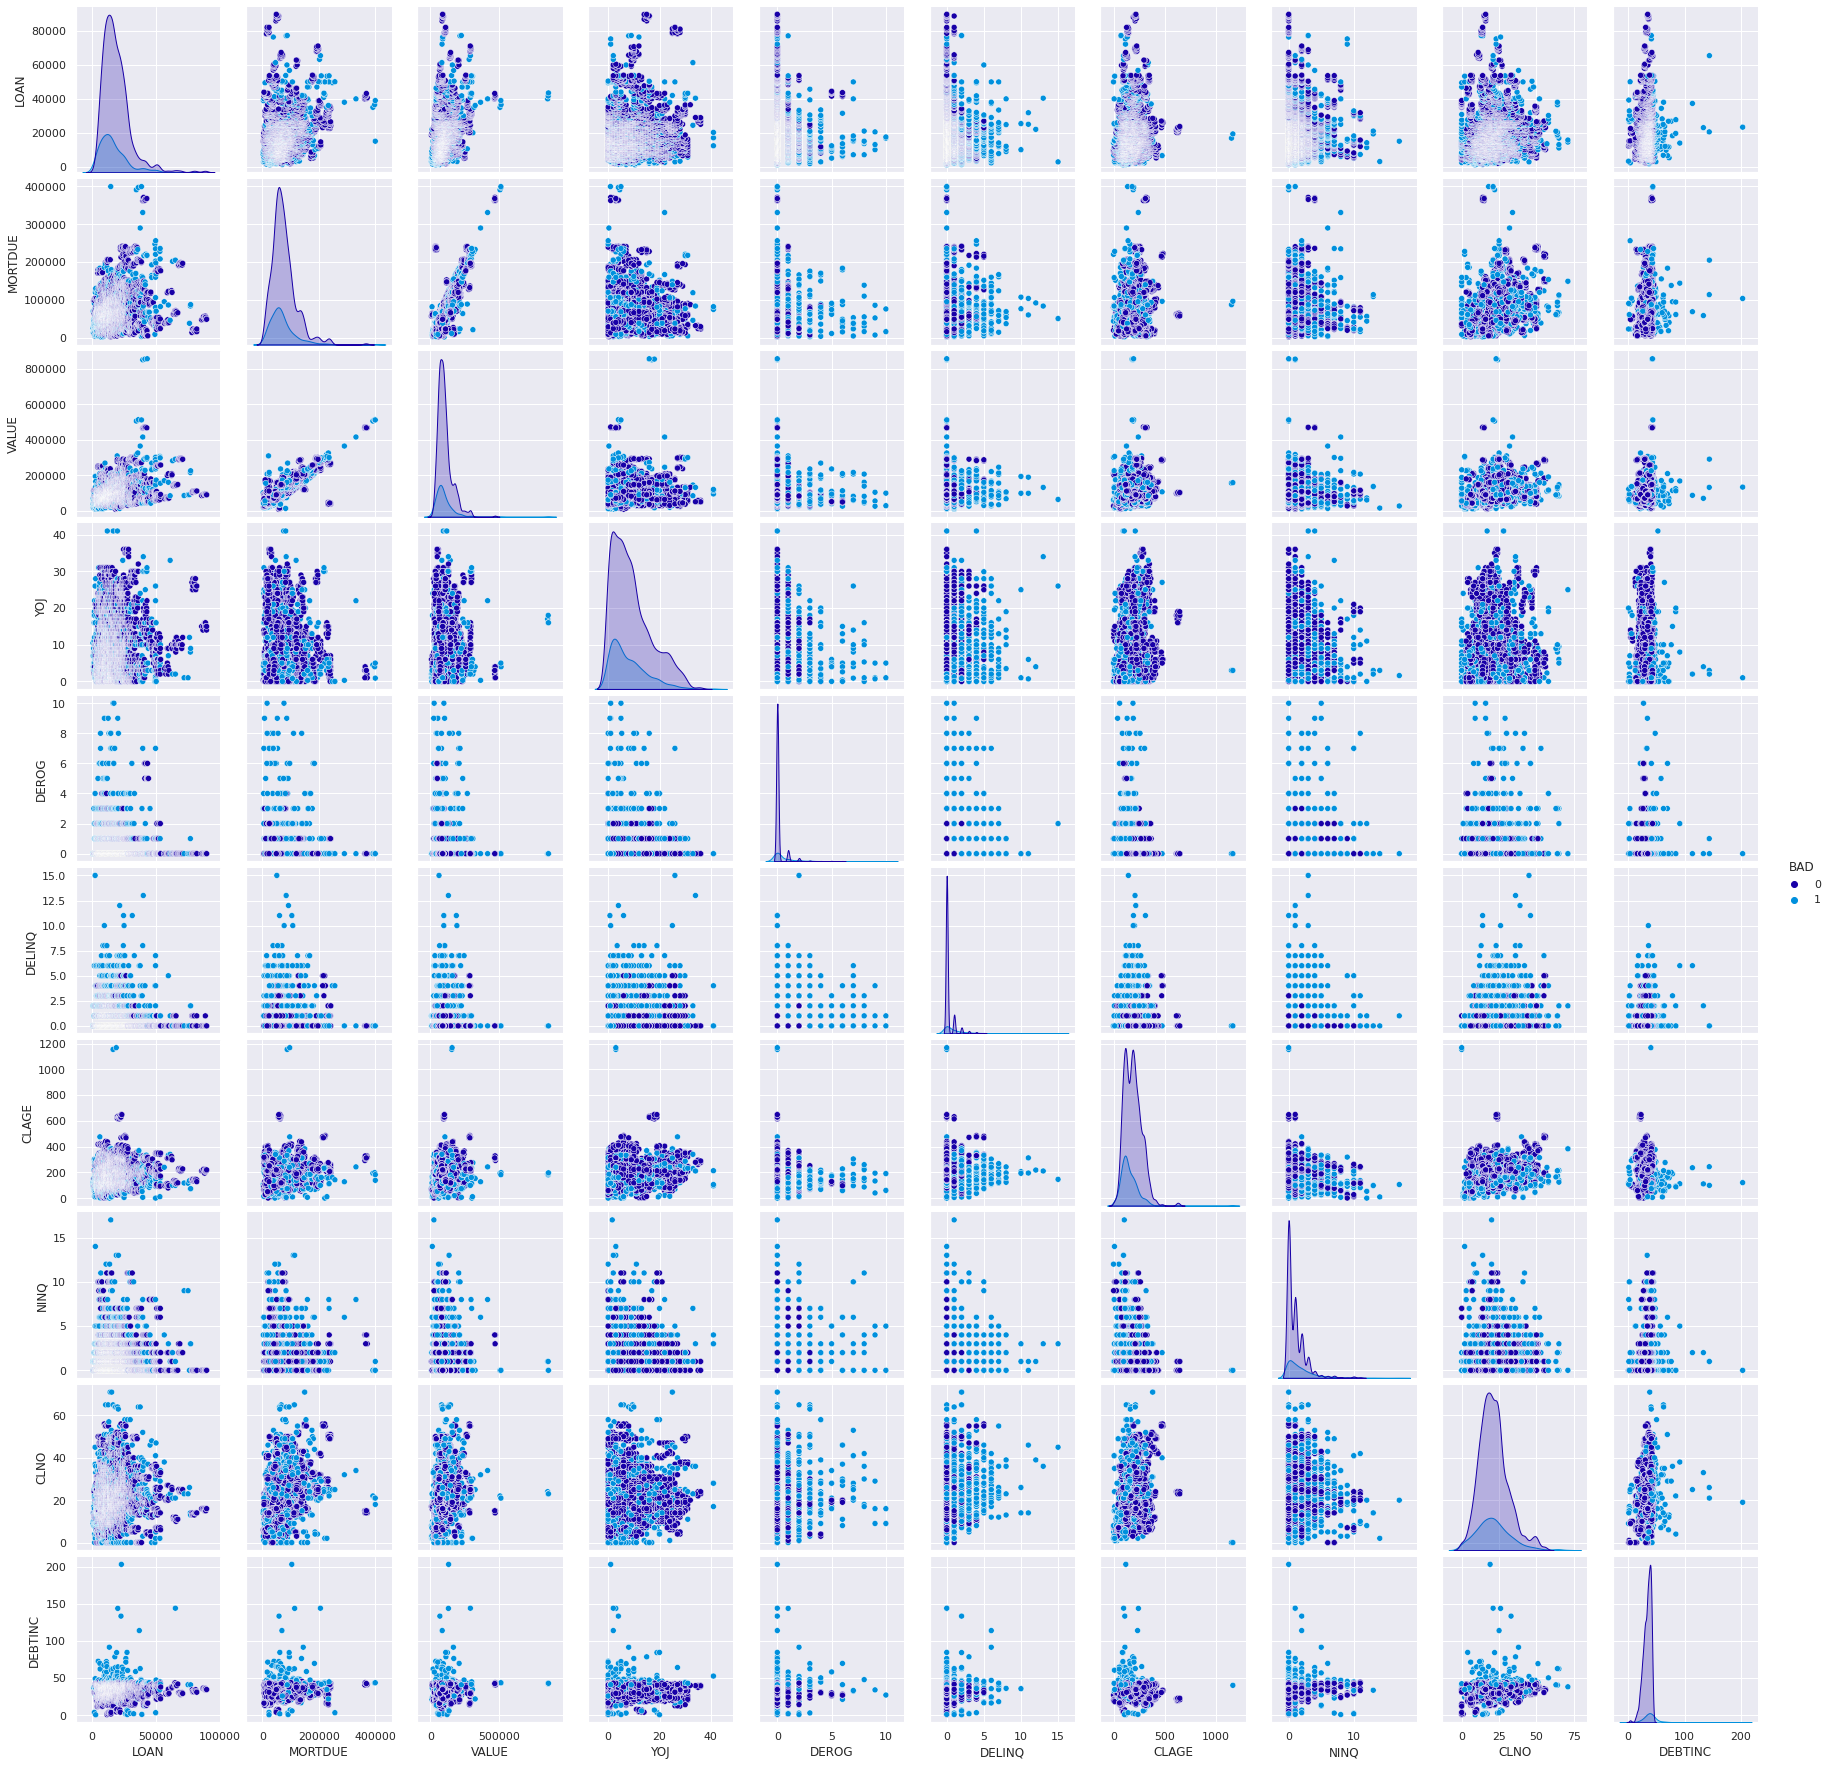

In [35]:
# Build pairplot for the data with hue = 'BAD'
# Remove ___________ and complete the code

plt.figure(figsize=(16,12))
sns.pairplot(data, hue="BAD")
plt.show()

### **Think about it**
- Are there missing values and outliers in the dataset? If yes, how can you treat them? 

  * There are many missing values and outliers in the dataset. 
  * We can treat missing values and outliers by replacing them with median, mode or mean value. 
  * We can also just drop the missing values. This method is easy to implement, however, it is might not a good solution as it can lose valuable data and insights from the dataset. 
- Can you think of different ways in which this can be done and when to treat these outliers or not?
   * Except the above methods, we can also use other algorithms, such as KNN, Naive Bayes to predict and replace the missing values or outliers. To be more specific, we can find the samples in the training set closes to the missing values or outliers and averages these nearby points to fill in the missing values.  
   * However KNN only works with numerical data. We can convert non-numberical to numerical data for use with the KNN imputer. 
- Can we create new features based on Missing values?
   * Yes, we can create new features containing information about missing values, where 1 will represent a missing value. This method can help us prevent the impact of large number of missing values on the result, this will not lead to a bad performing model.

#### Treating Outliers

In [36]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    
    Q1= df[col].quantile(q=0.25) # 25th quantile
    Q3= df[col].quantile(q=0.75)  # 75th quantile
    IQR= Q3-Q1   # IQR Range
    Lower_Whisker = Q1-1.5*IQR  #define lower whisker
    Upper_Whisker = Q3+1.5*IQR  # define upper Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df
    

In [37]:
df_raw = data.copy()

numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

df = treat_outliers_all(df_raw,numerical_col)

#### Adding new columns in the dataset for each column which has missing values 

In [38]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0. 
def add_binary_flag(df,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary falg for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    df[new_col] = df[col].isna()
    return df

In [39]:
# list of columns that has missing values in it
missing_col = [col for col in df.columns if df[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(df,colmn)
    

#### Filling missing values in numerical columns with median and mode in categorical variables

In [40]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = df.select_dtypes('number')

# Select string and object columns.
cat_data = df.select_dtypes('category').columns.tolist()#df.select_dtypes('object')

# Fill numeric columns with median.
# Remove _________ and complete the code

df[num_data.columns] = num_data.fillna(df[num_data.columns].median())



# Fill object columns with model.
# Remove _________ and complete the code
for column in cat_data:
    mode = df[column].mode()[0]
    df[column] = df[column].fillna(df[column].mode()[0])



In [41]:
df.isnull().sum()

BAD                            0
LOAN                           0
MORTDUE                        0
VALUE                          0
REASON                         0
JOB                            0
YOJ                            0
DEROG                          0
DELINQ                         0
CLAGE                          0
NINQ                           0
CLNO                           0
DEBTINC                        0
MORTDUE_missing_values_flag    0
VALUE_missing_values_flag      0
REASON_missing_values_flag     0
JOB_missing_values_flag        0
YOJ_missing_values_flag        0
DEROG_missing_values_flag      0
DELINQ_missing_values_flag     0
CLAGE_missing_values_flag      0
NINQ_missing_values_flag       0
CLNO_missing_values_flag       0
DEBTINC_missing_values_flag    0
dtype: int64

## **Proposed approach**
**1. Potential techniques** - What different techniques should be explored?
   * We will use logistic regression model, decision tree model and random forest model to predict whether the applicants deault on loan or not.
   * Compared with logistic regression model, decision tree model provide a graphical and intuitive way to interpret and they are tolerant to missing values. However, decision tree model is quite prone to overfitting to the training data and can be sensible to outliers. 
   * Besides, a single decision tree model has limit power to make perfect predictions. Compared with decision tree model, the random forest model can combine several trees to forests to build a stronger ensemble model.   

**2. Overall solution design** - What is the potential solution design?
  * Build logistic regression model
    * Fit the model on the training data
    * Check the performance on testing data
  * Build a decision tree model
    * Split the data into training and testing data
    * Check the performance on testing data
  * Add class weight on decision tree model
    * Check the performance on testing data
  * Build a tuned decision tree model
    * Check the performance on testing data
  * Build a random forest model
    * Choose criterion
    * Check the performance on testing data
  * Add class weight on random forest model
    * Check the performance on testing data
  * Build a tuned random forest model
    * Check the performance on testing data
  * Compared the performance among the above model and choose the best one
  

**3. Measures of success** - What are the key measures of success?

* We will compare the performance among different models. If the model has high accuracy and f1-score in the testing data, and solves the overfitting problem, they we can say it performed well.  


# **Milestone 2**

## **Model Building - Approach**
1. Data preparation
2. Partition the data into train and test set
3. Fit on the train data
4. Tune the model and prune the tree, if required
5. Test the model on test set

## **Data Preparation**

### **Separating the target variable from other variables**

In [42]:
# Drop the dependent variable from the dataframe and create the X(independent variable) matrix

X = df.drop(['BAD'],axis=1)

# Create dummy variables for the categorical variables - Hint: use the get_dummies() function
# Remove _________ and complete the code
X = pd.get_dummies(X, drop_first=True)

# Create y(dependent varibale)
# Remove _________ and complete the code

y = df['BAD']

### **Splitting the data into 70% train and 30% test set**

In [43]:
# Split the data into training and test set
# Remove _________ and complete the code


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

### **Think about it** 
- You can try different splits like 70:30 or 80:20 as per your choice. Does this change in split affect the performance?
 * I tried differnt splits like 80:20 in the last part of this notebook. We can find that the model performance between 70:30 splits and 80:20 splits is slightly different but almost similar. The recall value of 80:20 splits increased significantly and precision decreased in tuned decison tree model, which let the performance of  turn to be worser than the 70:30 splits. The rest of models' performance almost remain the same.


- If the data is imbalanced, can you make the split more balanced and if yes, how?
 * Yes, we can make the split more balanced. We can see there is a skew in the default class compared to not default class in the below chart. There are serveral methods to solve the imbalanced problem, such as add class weight and SMOTE. 
 * **SMOTE** is an oversampling technique. SMOTE works by creating new syntheitc data smaples that are similar to existing data samples in the minority class. We first need to import the imblearn package, which includes SMOTE and their variation. Then we use two continuous features with target variable and try to oversampled the data using the SMOTE technique. Then we can create a scatterplot to observe whether the class 0 and class 1 have a similar proportion. To evaluate whether oversampling data leads to a better model or not, we split the data, create the preodiction model and oversampled the training data. Nes, we are going to create the classification model and see the performance of the Logistic regression model trained with imbalanced data. Finally, we can compare the performance between oversampled data and imbalance data. In general, the oversampled data helps our logistic regression model to predict the class 1 better. 
 * We can also use **class weight** to address class imbalance in models. Class weighting adjusts the logistics regression function of the model so that misclassifying an observation from the minority class is more heavily penzlized than misclassifying an observation from the majority class. This approach can help improve the accuracy of the model by rebalancing the class distribution.


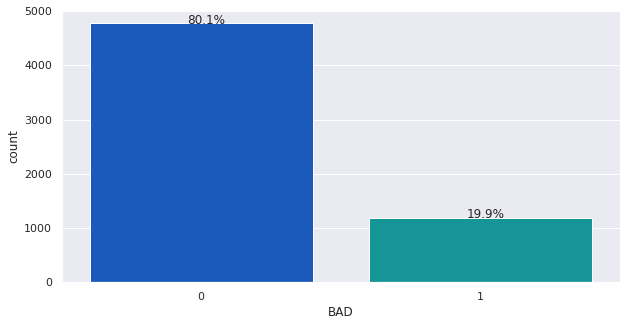

In [44]:
#Build barplot for BAD
plt.figure(figsize=(10,5))
ax = sns.countplot(data["BAD"],palette='winter')
perc_on_bar(ax,data["BAD"])

## **Model Evaluation Criterion**

#### After understanding the problem statement, think about which evaluation metrics to consider and why. 

In [45]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### **Build a Logistic Regression Model** 

In [46]:
# Defining the Logistic regression model
# Remove _________ and complete the code
logreg= LogisticRegression()

# Fitting the model on the training data 
# Remove _________ and complete the code

logreg.fit(X_train,y_train)

LogisticRegression()

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      3355
           1       0.69      0.02      0.05       817

    accuracy                           0.81      4172
   macro avg       0.75      0.51      0.47      4172
weighted avg       0.78      0.81      0.73      4172



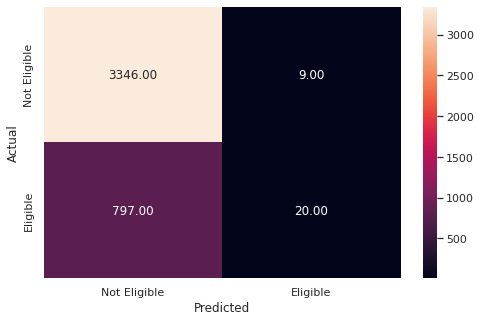

In [47]:
#Predict for train set
# Remove _________ and complete the code
y_pred_train1=logreg.predict(X_train)


#checking the performance on the train dataset
# Remove _________ and complete the code
metrics_score(y_train, y_pred_train1)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1416
           1       0.43      0.01      0.02       372

    accuracy                           0.79      1788
   macro avg       0.61      0.50      0.45      1788
weighted avg       0.72      0.79      0.70      1788



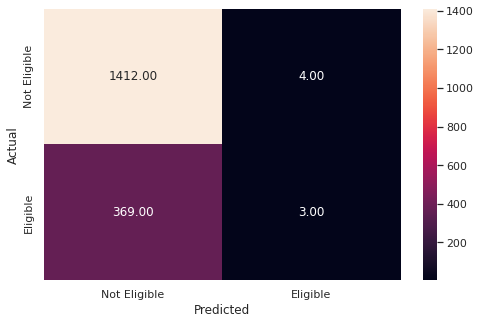

In [48]:
#Predict for test set
# Remove _________ and complete the code
y_pred_test1=logreg.predict(X_test)


#checking the performance on the test dataset
# Remove _________ and complete the code
metrics_score(y_test, y_pred_test1)

**Observations: __________**
* In the trainin set, the recall is 0.02, the f1-score is 0.05 and the accuracy is 0.81. We can observe that the data is imbalanced and it has a high chance of false negative. The model will predict the bank would take extra precaution to applicants, which will make bank loss opportunity of earning profit.  
* In the testing set, the recall is 0.01, the f1-score is 0.02 and the accuracy is 0.79. The testing data is not overfitting. But we can find that dataset is still imbalanced, we will use class weight method to address the imbalanced. 

#### Let's check the coefficients, and check which variables are important and how they affect the process of loan approval

In [49]:
# Printing the coefficients of logistic regression
# Remove _________ and complete the code
cols=X.columns

coef_logreg = logreg.coef_

pd.DataFrame(coef_logreg, columns=cols).T.sort_values(by=0, ascending=False)

,0
DEBTINC,0.020758
CLNO,0.007849
NINQ,0.004581
DEBTINC_missing_values_flag,0.004216
VALUE_missing_values_flag,0.000671
JOB_Self,0.000183
REASON_HomeImp,0.000170
JOB_Sales,0.000131
CLAGE_missing_values_flag,0.000110
JOB_Other,0.000088


**Insights ________**
* DEBTING and CLNO are the top features that help bank define applicants who are more likely to default on loan.

### **Think about it:**
- The above Logistic regression model was build on the threshold of 0.5, can we use different threshold?
  * Yes, we can use different threshold to classify data. The default value of threshold is 0.5.
- How to get an optimal threshold and which curve will help you achieve?
  * We can use the precision- recall curve for logistic regression to get an optimal threshold. We can observe that the precision and recall are balanced for a threshold of about 0.3 in the below graph.
- How does, accuracy, precision and recall change on the threshold?
  * The model performance has improved. The recall in both training and testing data has significantly increased for class 1 compared with the model with threhold is 0.5. The precision decreased in both training and tesing with the threshold changed. F1-score has increased significantly and the accuracy has decreased slightly.
  * We can observe that the impact of false negative has increased and the impact of false positive decreased, compared with the model with threshold with 0.5. Now both precision and recall are at a balanced level. 

In [52]:
from sklearn.metrics import precision_recall_curve

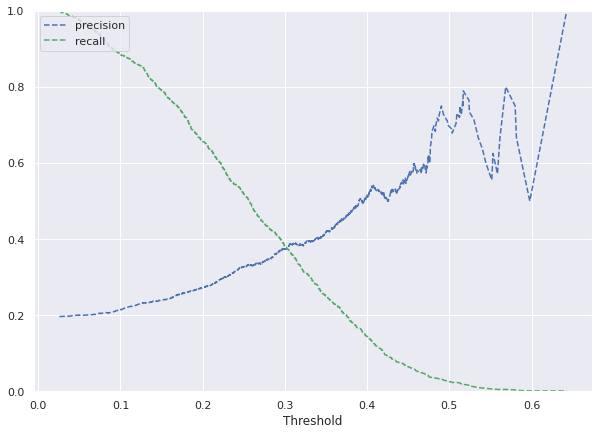

In [53]:
y_scores_lg = logreg.predict_proba(X_train) # predict_proba gives the probability of each observation belonging to each class


precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:, 1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))

plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label = 'precision')

plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')

plt.xlabel('Threshold')

plt.legend(loc = 'upper left')

plt.ylim([0, 1])

plt.show()

**Observation**
 * We can see that the precision and recall are balanced for a threhold of about 0.3.

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      3355
           1       0.37      0.38      0.38       817

    accuracy                           0.75      4172
   macro avg       0.61      0.61      0.61      4172
weighted avg       0.76      0.75      0.76      4172



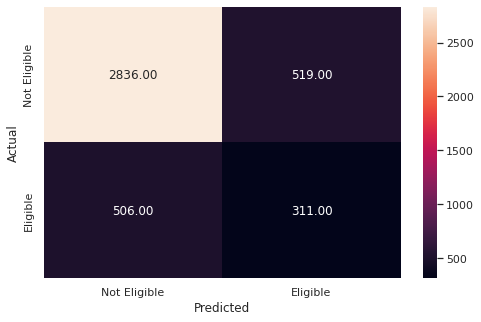

In [57]:
optimal_threshold1 = .3

y_pred_train = logreg.predict_proba(X_train)

metrics_score(y_train, y_pred_train[:, 1] > optimal_threshold1)

**Observations:**
 * The model performance has improved. The recall in training data has significantly increased for class 1. The accuracy decreased slightly.
 * Let's check the performance on the test data.

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1416
           1       0.36      0.34      0.35       372

    accuracy                           0.74      1788
   macro avg       0.60      0.59      0.60      1788
weighted avg       0.73      0.74      0.74      1788



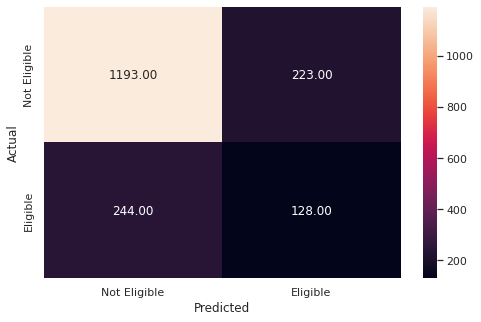

In [58]:
optimal_threshold1 = .3

y_pred_test = logreg.predict_proba(X_test)

metrics_score(y_test, y_pred_test[:, 1] > optimal_threshold1)

**Observations:**
 * The model is giving a smiliar performance on the training and testing data. The model is giving a generalized performance. 
 * The value of recall and accuracy on the testing data has significantly increased compared with the model with threhold is 0.5, however it's decreased slightly compared with the training data. 
 * The average recall and precision are good but let's see if we can get better performance using other algorithms.

### **Build a Decision Tree Model**

### **Think about it:**
- In Logistic regression we treated the outliers and built the model, should we do the same for tree based models or not? If not, why?
  * We don't need to do the same for tree based models because it is not sensitive with outliers and missing values. Since the metrics used for splitting the node of decision tree (information gain or Gini imourity) and aggregative functions (Mean or median) are not influenced by outliers. Thus, tree based model is robustness and it is not sensitve with outliers. 

#### Data Preparation for the tree based model

In [59]:
# Add binary flags
# List of columns that has missing values in it
missing_col = [col for col in data.columns if data[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(data,colmn)
    

In [60]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = data.select_dtypes('number')

# Select string and object columns.
cat_data = data.select_dtypes('category').columns.tolist()#df.select_dtypes('object')

# Fill numeric columns with median.
# Remove _________ and complete the code
data[num_data.columns] = num_data.fillna(data[num_data.columns].median())

# Fill object columns with model.
# Remove _________ and complete the code
for column in cat_data:
    mode = data[column].mode()[0]
    data[column] = data[column].fillna(data[column].mode()[0])

In [61]:
data.isnull().sum()

BAD                            0
LOAN                           0
MORTDUE                        0
VALUE                          0
REASON                         0
JOB                            0
YOJ                            0
DEROG                          0
DELINQ                         0
CLAGE                          0
NINQ                           0
CLNO                           0
DEBTINC                        0
MORTDUE_missing_values_flag    0
VALUE_missing_values_flag      0
REASON_missing_values_flag     0
JOB_missing_values_flag        0
YOJ_missing_values_flag        0
DEROG_missing_values_flag      0
DELINQ_missing_values_flag     0
CLAGE_missing_values_flag      0
NINQ_missing_values_flag       0
CLNO_missing_values_flag       0
DEBTINC_missing_values_flag    0
dtype: int64

#### Separating the target variable y and independent variable x

In [62]:
# Drop dependent variable from dataframe and create the X(independent variable) matrix
# Remove _________ and complete the code
X = data.drop('BAD', axis=1)

# Create dummy variables for the categorical variables - Hint: use the get_dummies() function
# Remove _________ and complete the code
X = pd.get_dummies(X, drop_first=True)


# Create y(dependent varibale)
# Remove _________ and complete the code

y = data['BAD']


#### Split the data

In [75]:
# Split the data into training and test set
# Remove _________ and complete the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [135]:
#Defining Decision tree model with class weights class_weight={0: 0.3, 1: 0.7}
# Remove ___________ and complete the code

d_tree= DecisionTreeClassifier(class_weight = {0: 0.3, 1: 0.7}, random_state=1)

In [136]:
#fitting Decision tree model
# Remove ___________ and complete the code
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3827
           1       1.00      1.00      1.00       941

    accuracy                           1.00      4768
   macro avg       1.00      1.00      1.00      4768
weighted avg       1.00      1.00      1.00      4768



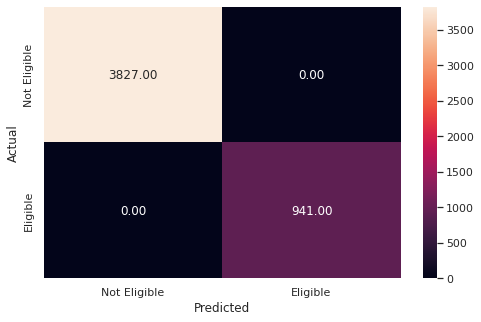

In [137]:
# Checking performance on the training data
# Remove ___________ and complete the code

y_pred_train2=d_tree.predict(X_train)

metrics_score(y_train, y_pred_train2)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       944
           1       0.70      0.60      0.65       248

    accuracy                           0.86      1192
   macro avg       0.80      0.77      0.78      1192
weighted avg       0.86      0.86      0.86      1192



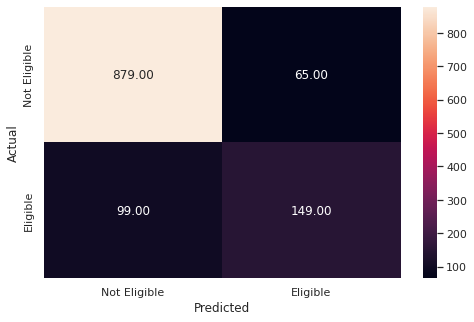

In [138]:
# Checking performance on the testing data
# Remove _________ and complete the code

y_pred_test2 = d_tree.predict(X_test)

metrics_score(y_test, y_pred_test2)

**Insights _____________**

* Both precision and recall are equal to 1 in the training data, which means there is no false negative and false positive in the training data. The model has performed very well on the training set.
* A decision tree will continue to grow and classify each data point correctly if no restrictions are applied, as the tree will learn all the patterns in the training set. So, it probably can overfit the training data.
* The decision tree works well on the training data but not well on the test data as the recall is 0.6 in comparison to 1 for the training data; and the precision in testing data is 0.7 in comparison to 1 for the training data, which means both false negative and false positive are much higher than training data.
* As recall is low, this model will not perform well in differenting out  the applicants who are likely to default on their loan or not , which means it will predict a applicant will repaid on their loan even though he/she would not. It will probably cause the bank a big lose and increase the amount of bad loans(NPA). 
* Besides, compared with the training data, the value of precision on the test data is relatively low as well. The value of precision suggests that there is a 30% chance that the model will predict the applicant is going to default even though he/she would not. This error will cause the bank take extra precaution and lose protential profits.



### **Think about it:**
- Can we improve this model? 
- How to get optimal parameters in order to get the best possible results?

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth** 

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them. 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


#### Using GridSearchCV for Hyperparameter tuning on the model

In [80]:
# Choose the type of classifier. 
# Remove _________ and complete the code 
d_tree_tuned = DecisionTreeClassifier(random_state = 1, class_weight = {0: 0.3, 1: 0.7})


# Grid of parameters to choose from
# Remove _________ and complete the code
parameters = {'max_depth': np.arange(2, 30), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
# Remove _________ and complete the code
scorer = metrics.make_scorer(recall_score, pos_label = 1)


# Run the grid search
# Remove _________ and complete the code
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)


# Fit the GridSearch on train dataset
# Remove _________ and complete the code
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
# Remove _________ and complete the code
d_tree_tuned = grid_obj.best_estimator_



# Fit the best algorithm to the data. 
# Remove _________ and complete the code
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=9,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       min_samples_leaf=7, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      3355
           1       0.69      0.77      0.72       817

    accuracy                           0.89      4172
   macro avg       0.81      0.84      0.83      4172
weighted avg       0.89      0.89      0.89      4172



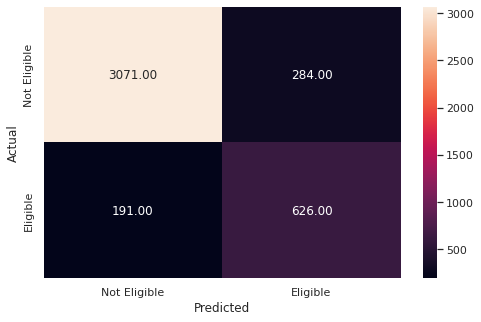

In [81]:
# Checking performance on the training data based on the tuned model
# Remove _________ and complete the code

y_pred_train3 = d_tree_tuned.predict(X_train)

metrics_score(y_train, y_pred_train3)

**Insights**
* Due to the precision is 0.69, the model has a high chance of false positive; the model will predict the clients would default on loans even though he/she would not. In this case, the bank will lose potential customers and lose profits.

* The decision tree works not very well on training data after we used the hyperparameter; since the both the percision and recall has decreased, which means the chance of both false positive and false negative are higher than the decision tree model with default parameters. This will not help with bank to reduce the losses.

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1416
           1       0.72      0.72      0.72       372

    accuracy                           0.88      1788
   macro avg       0.82      0.82      0.82      1788
weighted avg       0.88      0.88      0.88      1788



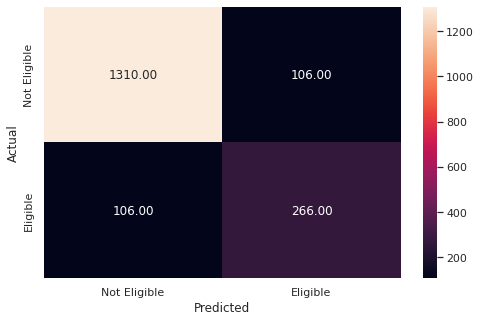

In [83]:
# Checking performance on the testing data based on the tuned model
# Remove _________ and complete the code

y_pred_test3 = d_tree_tuned.predict(X_test)

metrics_score(y_test, y_pred_test3)


**Insights ___________**

* The model is giving a similar performance on test and the train data. The overfitting has reduced significantly and the modelis performaing more generlized on both training and testing data.

* We can observe that the precision for the class 1 in the testing data has decreased significantly and the recall has increased obvisouly compared to the model with default parameters, which is to be expected while using the hyperparameter.

* The average recall and precision for the model are similar with the model with default parameters but let's see if we can get even better performance using other algorithms.



#### Plotting the Decision Tree

In [84]:
# Plot the decision  tree and analyze it to build the decision rule
# Remove _________ and complete the code

tree_model = DecisionTreeClassifier(class_weight = {0: 0.3, 1: 0.7}, max_depth = 3,
                       min_samples_leaf = 5, random_state = 1)

# Fit the best algorithm to the data
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=3,
                       min_samples_leaf=5, random_state=1)

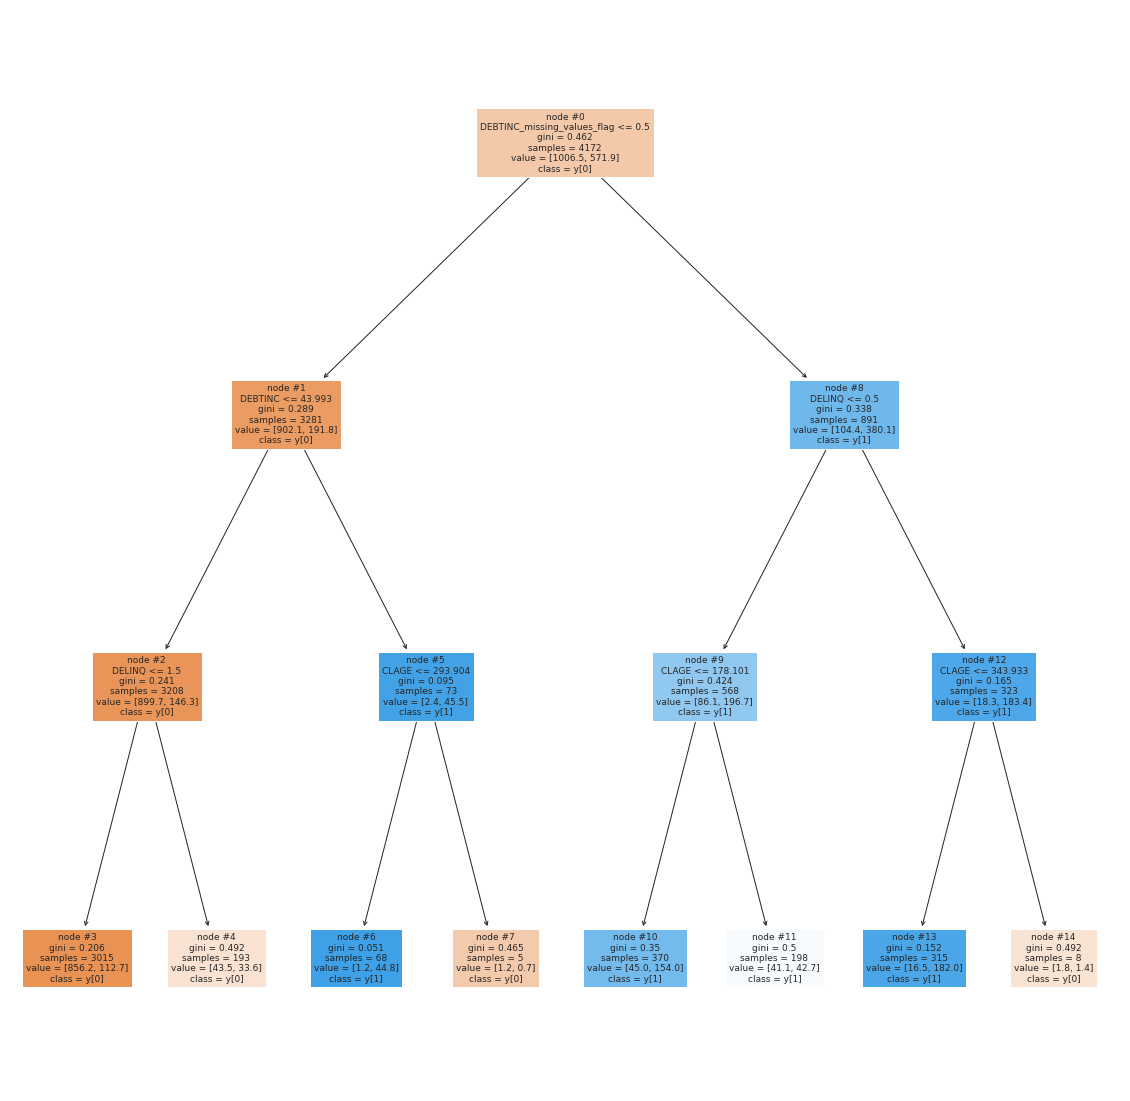

In [85]:
features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(tree_model, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()

#### Note
* Blue leaves represent the client defaulted on loan, i.e.,y[1]; while the light orange leaves represent the client repaid the loan, i.e.,y[0]. Also, the more the number of observations in a leaf, the darker its color gets. 

**Observations**
* The flag of the ratio of debt to income is the primary key in determining whether an applicant will default or not. We observed that the higher the flag of the ratio of debt to income, the more likely the client is to default.
* As per decision rules, clinets whose debt to income ratio flag is lesser, are less likely to default on the loan.
* Among the applicants whose debt to income ratio flag is higher and the number of delinquent credit lines is ~0.5 then the client is more likely to default on the loan.
* Among the applicants whose debt to income ratio flag is higher and the number of delinquent credit line is ~0.5 and the age of the oldest credit line is ~343 months, then the client is more likely to default on loan.
* Among the clients whose debt to income ratio flag is lower, and the value of debt to income ratio is ~43% and the age of the oldest credit line is ~293, then the client is more likely to default on loan. 

### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction. 

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [86]:
# Defining Random forest CLassifier
# Remove _________ and complete the code

rf_estimator = RandomForestClassifier(random_state = 1, criterion = "entropy")

rf_estimator.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



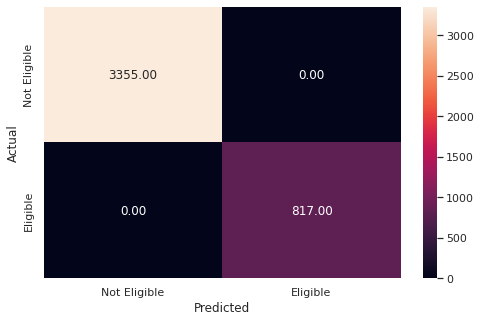

In [87]:
#Checking performance on the training data
# Remove _________ and complete the code
y_pred_train4 = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train4)

**Insights**
* Similar to the decision tree, both precision and recall are equal to 1, which means there is no false positive and false negative in the training data. The random forest is giving a perfect performance on the training data.

* The random forest classifier seems to be overfitting the training data as we observed for the decision tree.

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1416
           1       0.85      0.70      0.77       372

    accuracy                           0.91      1788
   macro avg       0.89      0.83      0.86      1788
weighted avg       0.91      0.91      0.91      1788



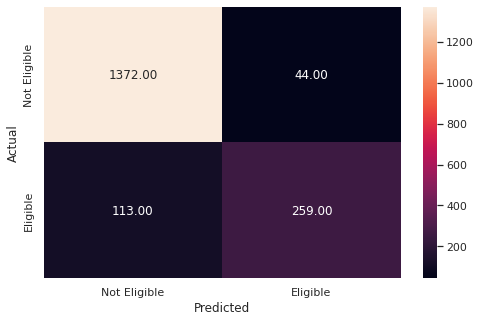

In [88]:
# Checking performance on the test data
# Remove _________ and complete the code

y_pred_test4 = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test4)

**Observations: __________**
* The random forest works well on the training data but no so well on the testing data as the recall decreased 30% and the precision decreased 15% compared to the training data. Thus, the false negative and false postive are much higher than the training data.
* Due to the value of recall in testing data is much lower than the training data. In this case, the bank will predict the applicants will repaid on loans but, in reality the applicants would have not. This will cause the bank a big lost.
* Even though the performance of the testing data is not as perfect as the training data, the testing accuracy is 86%, we can say the model is performing well and do not get overfitted.
* Compared to the decision tree, the results from random forest classifer were decent on the testing data, as the f1-score and the accuracy are higher than the testing data in the decision tree.
* Compared to the decision tree, the random forest algorithms reduced the overfitting to some extent.

### **Build a Random Forest model with Class Weights**

In [89]:
# Defining Random Forest model with class weights class_weight={0: 0.2, 1: 0.8}

# Remove _________ and complete the code

rf_class = RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

# Fitting Random Forest model
# Remove _________ and complete the code

rf_class.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



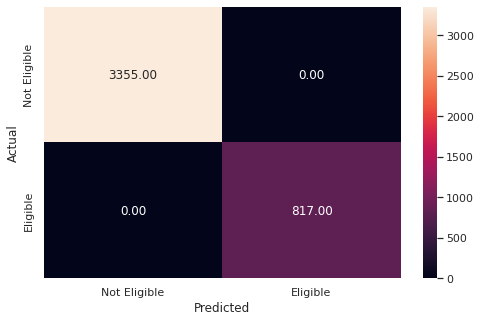

In [90]:
# Checking performance on the train data
# Remove _________ and complete the code

y_pred_train5 = rf_class.predict(X_train)

metrics_score(y_train, y_pred_train5)

**Insights**
* Similar to the decision tree and random forest classifier, both precision and recall are equal to 1, which means there is no false positive and false negative in the training data. The random forest model with class weights is giving a perfect performance on the training data.
* The random forest model with class weights seems to be overfitting the training data as we observed for the decision tree.

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1416
           1       0.86      0.67      0.75       372

    accuracy                           0.91      1788
   macro avg       0.89      0.82      0.85      1788
weighted avg       0.90      0.91      0.90      1788



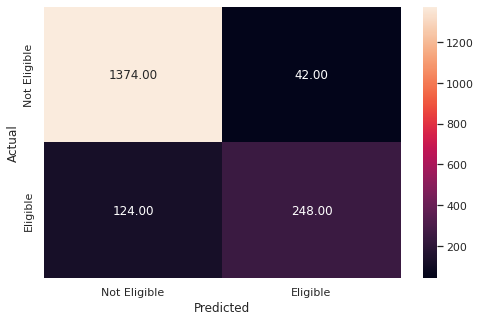

In [91]:
# Checking performance on the test data
# Remove _________ and complete the code

y_pred_test5 = rf_class.predict(X_test)

metrics_score(y_test, y_pred_test5)

**Insights**
* The random forest model with class weights works well on the training data but no so well on the testing data as the recall decreased 33% and the precision decreased 14% compared to the training data. Thus, the false negative and false postive are much higher than the training data.
* Due to the value of recall in testing data is much lower than the training data. In this case, the bank will predict the applicants will repaid on default on loans but, in reality the applicants would have not. This will cause the bank a big lost.
* The testing accuracy is 91%, we can say the model is performing well and do not get overfitted.
* The random forest model with class weights have the same results with the random forest classifier. But let's see if we can get even better performance using other algorithms.

### **Think about it:**
- Can we try different weights?
  * Yes tried different weights is an effective way to solve the imbalanced problem. We can confirm the small weight applied to the logistic regression function for the majority class that results in a smaller error value. A more considerable weight value applied to the logistic regression function for the minority class that results in a larger error calculation. We can shift the bias of the model so that it could also reduce the errors of the minority class. 
- If yes, should we increase or decrease class weights for different classes? 
  * We can see in the barplot, there are 80.1% client repaid on loan (class0) and 19.9% client default on loan (class1). So the class is imbalance. We need to increase the weight on the minority class(class 1) and reduce the weight on majority class(class0).

### **Tuning the Random Forest**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.


**n_estimators**: The number of trees in the forest.

**min_samples_split**: The minimum number of samples required to split an internal node:

**min_samples_leaf**: The minimum number of samples required to be at a leaf node. 

**max_features{“auto”, “sqrt”, “log2”, 'None'}**: The number of features to consider when looking for the best split.

- If “auto”, then max_features=sqrt(n_features).

- If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).

- If “log2”, then max_features=log2(n_features).

- If None, then max_features=n_features.

You can learn more about Random Forest Hyperparameters from the link given below and try to tune them

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

#### **Warning:** This may take a long time depending on the parameters you tune. 

In [92]:
# Choose the type of classifier. 
# Remove _________ and complete the code
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 1)


# Grid of parameters to choose from
# Remove _________ and complete the code
parameters = {"n_estimators": [100,250,500],
              "max_features":['auto','sqrt'],
    "min_samples_leaf":[1,2,5,7,10]
             }


# Type of scoring used to compare parameter combinations
# Remove _________ and complete the code
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
# Remove _________ and complete the code
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)


#fit the GridSearch on train dataset
# Remove _________ and complete the code
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
# Remove _________ and complete the code
rf_estimator_tuned = grid_obj.best_estimator_


# Fit the best algorithm to the data. 
# Remove _________ and complete the code
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



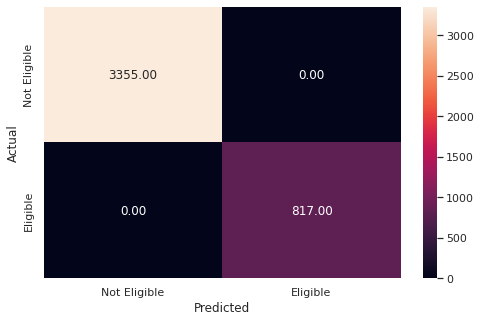

In [93]:
# Checking performance on the training data
# Remove _________ and complete the code
y_pred_train6 = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train6)

**Insights**
* Similar to the decision tree, both precision and recall are equal to 1, which means there is no false positive and false negative in the training data. The tuned random forest is giving a perfect performance on the training data.
* The tuned random forest model seems to be overfitting the training data.

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1416
           1       0.85      0.69      0.76       372

    accuracy                           0.91      1788
   macro avg       0.89      0.83      0.85      1788
weighted avg       0.91      0.91      0.91      1788



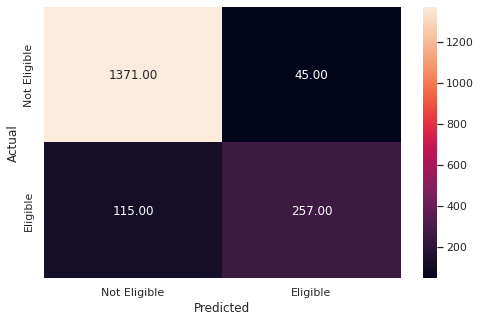

In [94]:
# Checking performace on test dataset
# Remove _________ and complete the code

y_pred_test6 = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test6)

**Insights: _____**
* The tuned random forest model works well on the training data but no so well on the testing data as the recall decreased 31% and the precision decreased 15% compared to the training data. Thus, the false negative and false postive are much higher than the training data.
* Compared with the model with default parameters, the precision for class 1 has significantly decreased from 0.9 to 0.85 and the recall has slightly increased from 0.67 to 0.69. But the average of recall and percision (f1-score) almost remained the same.
* The f1-score and the accuracy of this model and the model with default parmeters are similar with each other.
* Compared with the model with class weights, the precision for class 1 has slightly decreased while the recall has slightly increased. But the f1-score and accuracy almost remained the same. Thus, we can conclude that both tuned random forest and the random forest model with class weights have the similiar performance and reduced the overfitting.
 

#### Plot the Feature importance of the tuned Random Forest

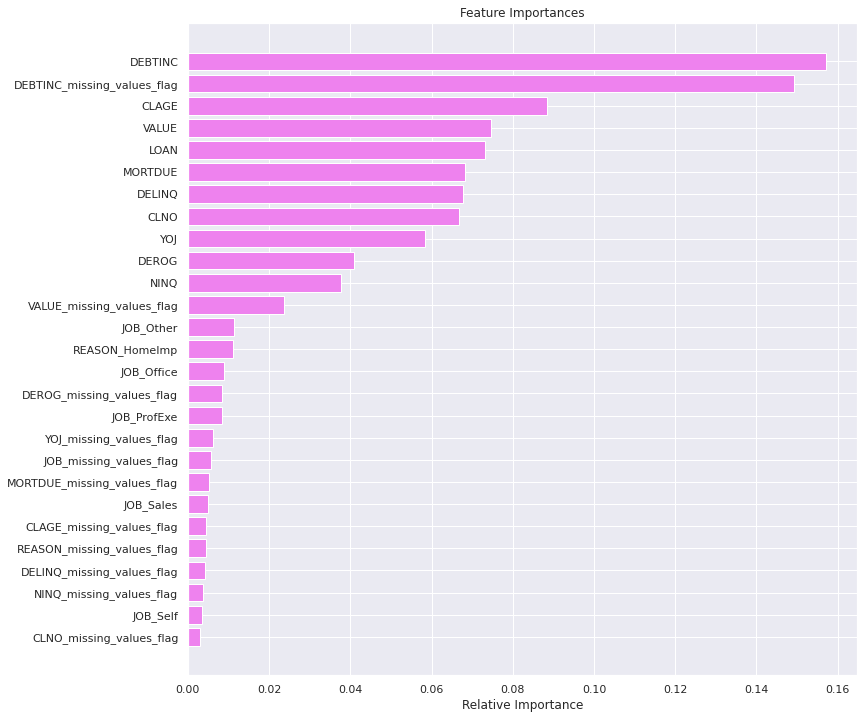

In [95]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
# Checking performace on test dataset
# Remove _________ and complete the code

importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

### **Think about it:**
- We have only built 3 models so far, Logistic Regression, Decision Tree and Random Forest 
- We can build other Machine Learning classification models like kNN, LDA, QDA or even Support Vector Machines (SVM).
- Can we also perform feature engineering and create model features and build a more robust and accurate model for this problem statement? 
 * Yes, we can perform feature engineering and create model feature and build more robust and accurate model based on the most important feature in determining whether the client will default on loan or not. Make sure we drop the unnecessary columns before we encode features. Take LDA as an example, we can use the most important feature to fit the LDA model and get the LDA error rate. Then we can use all features to fit the model and then get the new LDA error rate. Next compared with the two error rate.

### **Comparing Model Performances**

In [96]:
def get_recall_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [97]:
##  Function to calculate precision score
def get_precision_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of x

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [98]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [99]:
# Make the list of all the model names 

models = [d_tree, d_tree_tuned, rf_estimator, rf_class, rf_estimator_tuned]
# Remove _________ and complete the code

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
     # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [100]:
# Mention the Model names in the list. for example 'Model': ['Decision Tree', 'Tuned Decision Tree'..... write tht names of all model built]
# Remove _________ and complete the code

comparison_frame = pd.DataFrame({'Model':['Decision Tree', 'Tuned Decision Tree', 'Random Forest', 'Random Forest with Class Weights', 'Tuned Random Forest'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Decision Tree,1.000000,0.868568,1.000000,0.629032,1.000000,0.706949
1,Tuned Decision Tree,0.886146,0.881432,0.766218,0.715054,0.687912,0.715054
2,Random Forest,1.000000,0.912192,1.000000,0.696237,1.000000,0.854785
3,Random Forest with Class Weights,1.000000,0.907159,1.000000,0.666667,1.000000,0.855172
4,Tuned Random Forest,1.000000,0.910515,1.000000,0.690860,1.000000,0.850993


**Insights: ________**

* **Not finised yet :)**

**1. Refined insights -** What are the most meaningful insights from the data relevant to the problem?

**2. Comparison of various techniques and their relative performance -** How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

**3. Proposal for the final solution design -** What model do you propose to be adopted? Why is this the best solution to adopt?

### **Splitting the data into 80% train and 20% test set**

In [ ]:
# Split the data into training and test set
# Remove _________ and complete the code


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## **Model Evaluation Criterion**

#### After understanding the problem statement, think about which evaluation metrics to consider and why. 

In [101]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### **Build a Logistic Regression Model** 

In [102]:
# Defining the Logistic regression model
# Remove _________ and complete the code
logreg= LogisticRegression()

# Fitting the model on the training data 
# Remove _________ and complete the code

logreg.fit(X_train,y_train)

LogisticRegression()

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      3355
           1       0.74      0.04      0.07       817

    accuracy                           0.81      4172
   macro avg       0.78      0.52      0.48      4172
weighted avg       0.80      0.81      0.73      4172



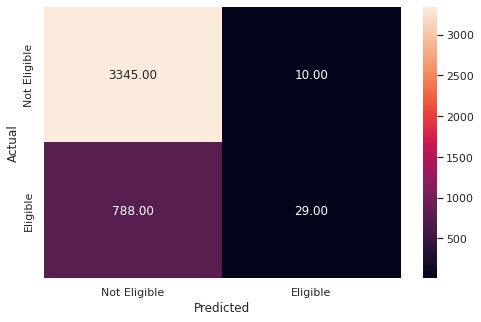

In [103]:
#Predict for train set
# Remove _________ and complete the code
y_pred_train1=logreg.predict(X_train)


#checking the performance on the train dataset
# Remove _________ and complete the code
metrics_score(y_train, y_pred_train1)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1416
           1       0.50      0.01      0.02       372

    accuracy                           0.79      1788
   macro avg       0.65      0.50      0.45      1788
weighted avg       0.73      0.79      0.70      1788



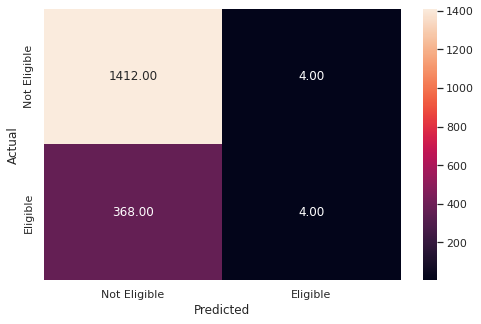

In [104]:
#Predict for test set
# Remove _________ and complete the code
y_pred_test1=logreg.predict(X_test)


#checking the performance on the test dataset
# Remove _________ and complete the code
metrics_score(y_test, y_pred_test1)

#### Let's check the coefficients, and check which variables are important and how they affect the process of loan approval

In [105]:
# Printing the coefficients of logistic regression
# Remove _________ and complete the code
cols=X.columns

coef_logreg = logreg.coef_

pd.DataFrame(coef_logreg, columns=cols).T.sort_values(by=0, ascending=False)

,0
DEBTINC,0.019900
CLNO,0.006502
DELINQ,0.006271
NINQ,0.004773
DEROG,0.003985
DEBTINC_missing_values_flag,0.003727
VALUE_missing_values_flag,0.000598
JOB_Self,0.000158
REASON_HomeImp,0.000114
JOB_Sales,0.000114


### **Build a Decision Tree Model**

### **Think about it:**
- In Logistic regression we treated the outliers and built the model, should we do the same for tree based models or not? If not, why?

#### Data Preparation for the tree based model

In [106]:
# Add binary flags
# List of columns that has missing values in it
missing_col = [col for col in data.columns if data[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(data,colmn)
    

In [107]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = data.select_dtypes('number')

# Select string and object columns.
cat_data = data.select_dtypes('category').columns.tolist()#df.select_dtypes('object')

# Fill numeric columns with median.
# Remove _________ and complete the code
data[num_data.columns] = num_data.fillna(data[num_data.columns].median())

# Fill object columns with model.
# Remove _________ and complete the code
for column in cat_data:
    mode = data[column].mode()[0]
    data[column] = data[column].fillna(data[column].mode()[0])

In [108]:
data.isnull().sum()

BAD                            0
LOAN                           0
MORTDUE                        0
VALUE                          0
REASON                         0
JOB                            0
YOJ                            0
DEROG                          0
DELINQ                         0
CLAGE                          0
NINQ                           0
CLNO                           0
DEBTINC                        0
MORTDUE_missing_values_flag    0
VALUE_missing_values_flag      0
REASON_missing_values_flag     0
JOB_missing_values_flag        0
YOJ_missing_values_flag        0
DEROG_missing_values_flag      0
DELINQ_missing_values_flag     0
CLAGE_missing_values_flag      0
NINQ_missing_values_flag       0
CLNO_missing_values_flag       0
DEBTINC_missing_values_flag    0
dtype: int64

#### Separating the target variable y and independent variable x

In [109]:
# Drop dependent variable from dataframe and create the X(independent variable) matrix
# Remove _________ and complete the code
X = data.drop('BAD', axis=1)

# Create dummy variables for the categorical variables - Hint: use the get_dummies() function
# Remove _________ and complete the code
X = pd.get_dummies(X, drop_first=True)


# Create y(dependent varibale)
# Remove _________ and complete the code

y = data['BAD']


#### Split the data

In [110]:
# Split the data into training and test set
# Remove _________ and complete the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [111]:
#Defining Decision tree model with class weights class_weight={0: 0.2, 1: 0.8}
# Remove ___________ and complete the code

d_tree= DecisionTreeClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state=1)

In [112]:
#fitting Decision tree model
# Remove ___________ and complete the code
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3827
           1       1.00      1.00      1.00       941

    accuracy                           1.00      4768
   macro avg       1.00      1.00      1.00      4768
weighted avg       1.00      1.00      1.00      4768



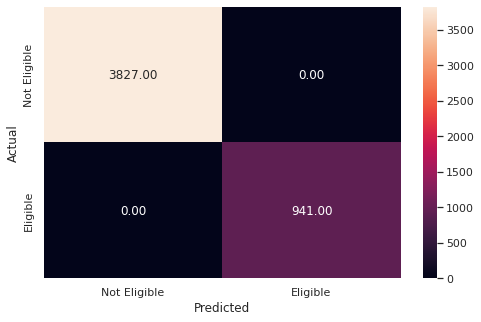

In [113]:
# Checking performance on the training data
# Remove ___________ and complete the code

y_pred_train2=d_tree.predict(X_train)

metrics_score(y_train, y_pred_train2)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       944
           1       0.71      0.63      0.67       248

    accuracy                           0.87      1192
   macro avg       0.81      0.78      0.79      1192
weighted avg       0.86      0.87      0.87      1192



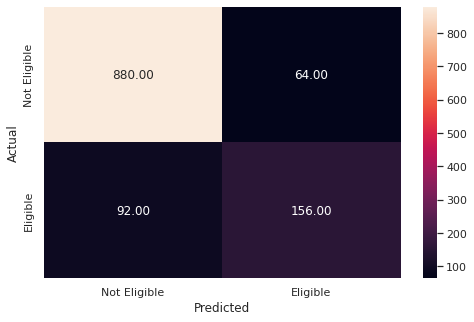

In [114]:
# Checking performance on the testing data
# Remove _________ and complete the code

y_pred_test2 = d_tree.predict(X_test)

metrics_score(y_test, y_pred_test2)

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth** 

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them. 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


#### Using GridSearchCV for Hyperparameter tuning on the model

In [115]:
# Choose the type of classifier. 
# Remove _________ and complete the code 
d_tree_tuned = DecisionTreeClassifier(random_state = 1, class_weight = {0: 0.2, 1: 0.8})


# Grid of parameters to choose from
# Remove _________ and complete the code
parameters = {'max_depth': np.arange(2, 30), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
# Remove _________ and complete the code
scorer = metrics.make_scorer(recall_score, pos_label = 1)


# Run the grid search
# Remove _________ and complete the code
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)


# Fit the GridSearch on train dataset
# Remove _________ and complete the code
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
# Remove _________ and complete the code
d_tree_tuned = grid_obj.best_estimator_



# Fit the best algorithm to the data. 
# Remove _________ and complete the code
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=10,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.96      0.84      0.90      3827
           1       0.57      0.84      0.68       941

    accuracy                           0.84      4768
   macro avg       0.76      0.84      0.79      4768
weighted avg       0.88      0.84      0.85      4768



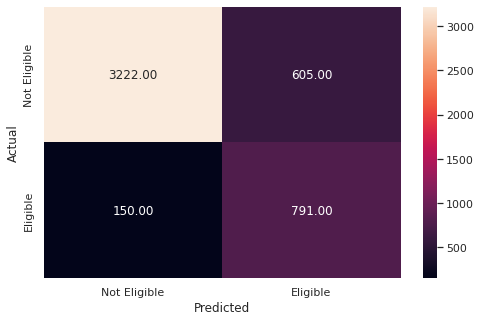

In [116]:
# Checking performance on the training data based on the tuned model
# Remove _________ and complete the code

y_pred_train3 = d_tree_tuned.predict(X_train)

metrics_score(y_train, y_pred_train3)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.94      0.85      0.89       944
           1       0.58      0.79      0.67       248

    accuracy                           0.84      1192
   macro avg       0.76      0.82      0.78      1192
weighted avg       0.86      0.84      0.84      1192



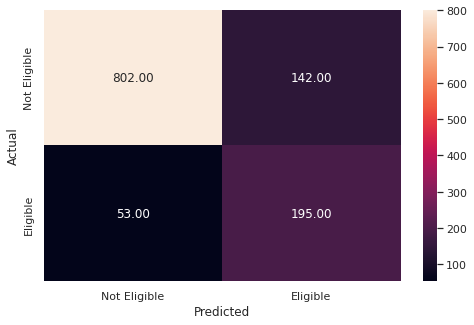

In [117]:
# Checking performance on the testing data based on the tuned model
# Remove _________ and complete the code

y_pred_test3 = d_tree_tuned.predict(X_test)

metrics_score(y_test, y_pred_test3)


#### Plotting the Decision Tree

In [118]:
# Plot the decision  tree and analyze it to build the decision rule
# Remove _________ and complete the code

tree_model = DecisionTreeClassifier(class_weight = {0: 0.2, 1: 0.8}, max_depth = 3,
                       min_samples_leaf = 5, random_state = 1)

# Fit the best algorithm to the data
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=3,
                       min_samples_leaf=5, random_state=1)

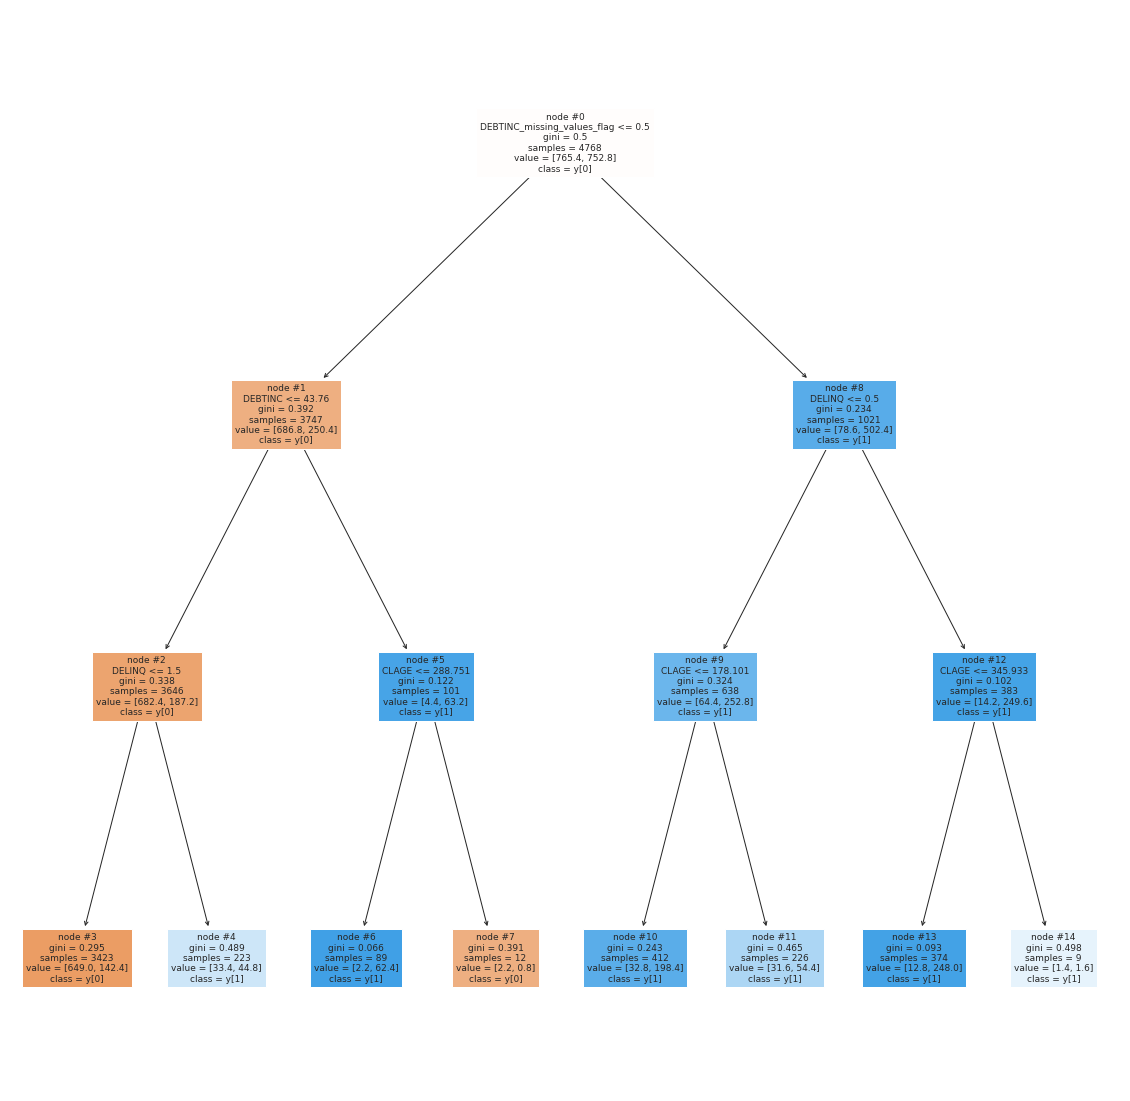

In [119]:
features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(tree_model, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()

#### Deduce the business rules apparent from the Decision Tree and write them down: _____

### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction. 

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [120]:
# Defining Random forest CLassifier
# Remove _________ and complete the code

rf_estimator = RandomForestClassifier(random_state = 1, criterion = "entropy")

rf_estimator.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3827
           1       1.00      1.00      1.00       941

    accuracy                           1.00      4768
   macro avg       1.00      1.00      1.00      4768
weighted avg       1.00      1.00      1.00      4768



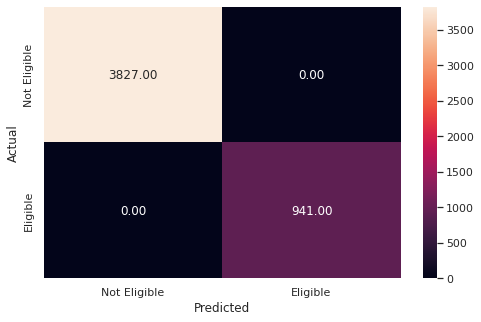

In [121]:
#Checking performance on the training data
# Remove _________ and complete the code
y_pred_train4 = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train4)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       944
           1       0.87      0.68      0.76       248

    accuracy                           0.91      1192
   macro avg       0.89      0.82      0.85      1192
weighted avg       0.91      0.91      0.91      1192



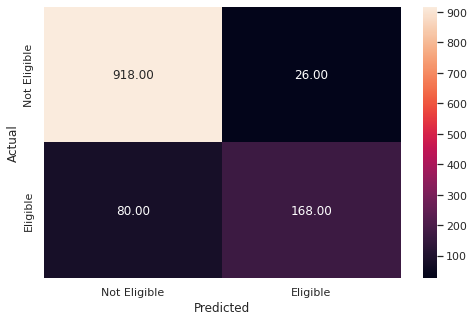

In [122]:
# Checking performance on the test data
# Remove _________ and complete the code

y_pred_test4 = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test4)

### **Build a Random Forest model with Class Weights**

In [123]:
# Defining Random Forest model with class weights class_weight={0: 0.2, 1: 0.8}

# Remove _________ and complete the code

rf_class = RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

# Fitting Random Forest model
# Remove _________ and complete the code

rf_class.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3827
           1       1.00      1.00      1.00       941

    accuracy                           1.00      4768
   macro avg       1.00      1.00      1.00      4768
weighted avg       1.00      1.00      1.00      4768



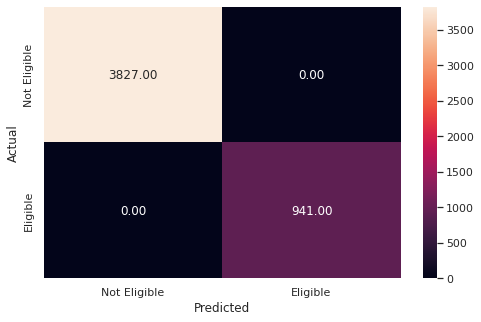

In [124]:
# Checking performance on the train data
# Remove _________ and complete the code

y_pred_train5 = rf_class.predict(X_train)

metrics_score(y_train, y_pred_train5)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       944
           1       0.87      0.69      0.77       248

    accuracy                           0.91      1192
   macro avg       0.90      0.83      0.86      1192
weighted avg       0.91      0.91      0.91      1192



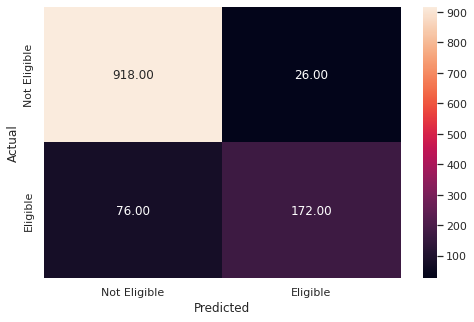

In [125]:
# Checking performance on the test data
# Remove _________ and complete the code

y_pred_test5 = rf_class.predict(X_test)

metrics_score(y_test, y_pred_test5)

### **Tuning the Random Forest**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.


**n_estimators**: The number of trees in the forest.

**min_samples_split**: The minimum number of samples required to split an internal node:

**min_samples_leaf**: The minimum number of samples required to be at a leaf node. 

**max_features{“auto”, “sqrt”, “log2”, 'None'}**: The number of features to consider when looking for the best split.

- If “auto”, then max_features=sqrt(n_features).

- If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).

- If “log2”, then max_features=log2(n_features).

- If None, then max_features=n_features.

You can learn more about Random Forest Hyperparameters from the link given below and try to tune them

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

#### **Warning:** This may take a long time depending on the parameters you tune. 

In [126]:
# Choose the type of classifier. 
# Remove _________ and complete the code
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 1)


# Grid of parameters to choose from
# Remove _________ and complete the code
parameters = {"n_estimators": [100,250,500],
              "max_features":['auto','sqrt'],
    "min_samples_leaf":[1,2,5,7,10]
             }


# Type of scoring used to compare parameter combinations
# Remove _________ and complete the code
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
# Remove _________ and complete the code
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)


#fit the GridSearch on train dataset
# Remove _________ and complete the code
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
# Remove _________ and complete the code
rf_estimator_tuned = grid_obj.best_estimator_


# Fit the best algorithm to the data. 
# Remove _________ and complete the code
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3827
           1       1.00      1.00      1.00       941

    accuracy                           1.00      4768
   macro avg       1.00      1.00      1.00      4768
weighted avg       1.00      1.00      1.00      4768



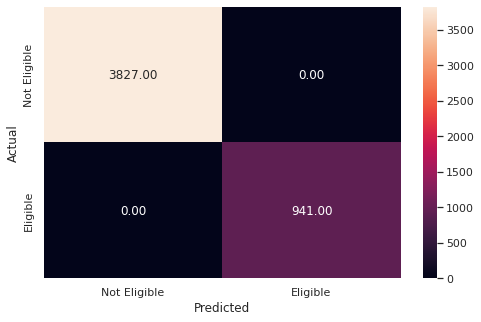

In [127]:
# Checking performance on the training data
# Remove _________ and complete the code
y_pred_train6 = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train6)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       944
           1       0.86      0.68      0.76       248

    accuracy                           0.91      1192
   macro avg       0.89      0.83      0.85      1192
weighted avg       0.91      0.91      0.91      1192



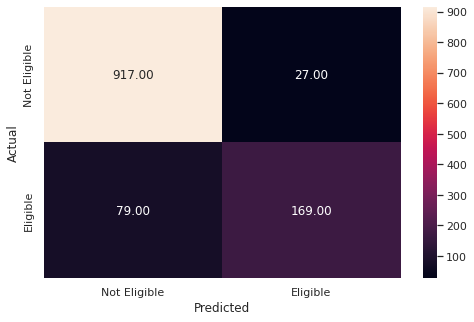

In [128]:
# Checking performace on test dataset
# Remove _________ and complete the code

y_pred_test6 = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test6)

#### Plot the Feature importance of the tuned Random Forest

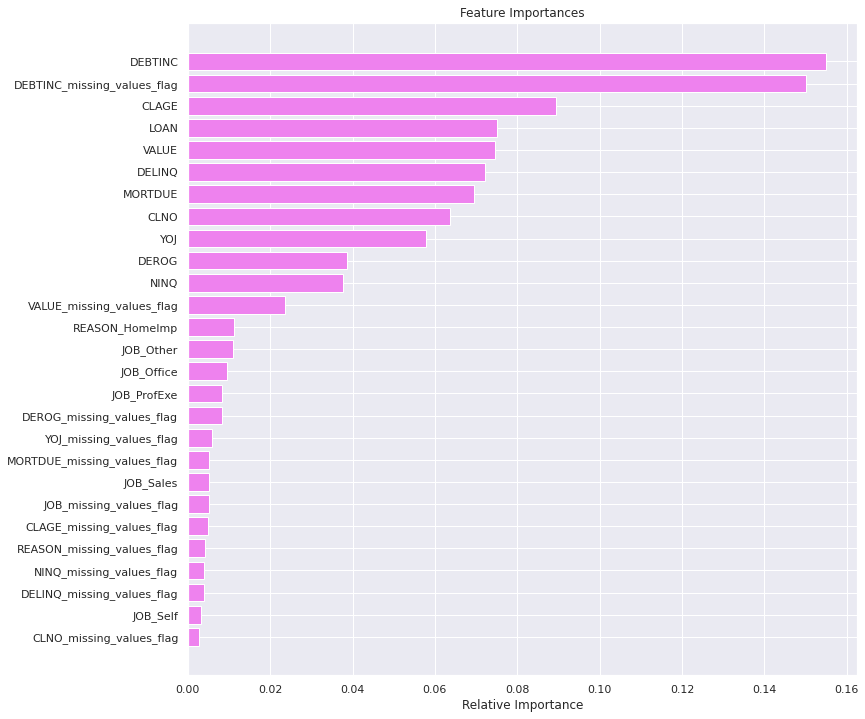

In [129]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
# Checking performace on test dataset
# Remove _________ and complete the code

importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

### **Comparing Model Performances**

In [130]:
def get_recall_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [131]:
##  Function to calculate precision score
def get_precision_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of x

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [132]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [133]:
# Make the list of all the model names 

models = [d_tree, d_tree_tuned, rf_estimator, rf_class, rf_estimator_tuned]
# Remove _________ and complete the code

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
     # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [134]:
# Mention the Model names in the list. for example 'Model': ['Decision Tree', 'Tuned Decision Tree'..... write tht names of all model built]
# Remove _________ and complete the code

comparison_frame = pd.DataFrame({'Model':['Decision Tree', 'Tuned Decision Tree', 'Random Forest', 'Random Forest with Class Weights', 'Tuned Random Forest'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Decision Tree,1.000000,0.869128,1.000000,0.629032,1.000000,0.709091
1,Tuned Decision Tree,0.841653,0.836409,0.840595,0.786290,0.566619,0.578635
2,Random Forest,1.000000,0.911074,1.000000,0.677419,1.000000,0.865979
3,Random Forest with Class Weights,1.000000,0.914430,1.000000,0.693548,1.000000,0.868687
4,Tuned Random Forest,1.000000,0.911074,1.000000,0.681452,1.000000,0.862245


**Insights: ________**

* **Not finised yet :)**

**1. Refined insights -** What are the most meaningful insights from the data relevant to the problem?

**2. Comparison of various techniques and their relative performance -** How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

**3. Proposal for the final solution design -** What model do you propose to be adopted? Why is this the best solution to adopt?